# Next

# Loading Data

In [1]:
import pandas as pd
from google.colab.drive import mount

In [2]:
mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Authorship Identification/Data/AuthorshipClassficiationTrain.xlsx')

train_data.head()

id                               text_in_author_style      author
0  5843  هذه الكتب التي أصدرتُها منذ بدأت كتابة باب "من...  يوسف إدريس
1  5844  صعب جِدًّا في ظل هذا التقسيم الإرهابي أن أقول ...  يوسف إدريس
2  5845  كان ممكنًا أن أتفادى هذا\n\nالموضوع الشائك، وأ...  يوسف إدريس
3  5846  ومن المُمكن للعراق وحده أن يَجتثَّه ويقضي على ...  يوسف إدريس
4  5847  كنتُ أريد أن أتناول موضوعًا من هذه المواضيع.\n...  يوسف إدريس

In [3]:
valid_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Authorship Identification/Data/AuthorshipClassficiationVal.xlsx')

valid_data.head()

id                               text_in_author_style      author
0  3835  من طفل في الخمسين\n\nعمري ما احتفلت أو حفلت بع...  يوسف إدريس
1  3836  ذلك الزمن العام هو العداد العام الذي\n\nدام يع...  يوسف إدريس
2  3837  مصر الغنية المثقفة المصنِّعة، والعرب\n\nوقد\n\...  يوسف إدريس
3  3838  ولأنها غريبة وراودتني فيها عن الناس وعن الحياة...  يوسف إدريس
4  3839  وليس ما ذكرته مرارة ولا ندمًا؛ فقد كان لا يمكن...  يوسف إدريس

# Statistics

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

## Data Size

In [ ]:
print(len(train_data))
print(len(train_data.author.value_counts()))
train_data.author.value_counts()

35122
21


author
حسن حنفي             3744
أحمد أمين            2897
جُرجي زيدان          2768
روبرت بار            2682
محمد حسين هيكل       2627
طه حسين              2376
عباس محمود العقاد    1829
فؤاد زكريا           1773
نجيب محفوظ           1634
أمين الريحاني        1567
عبد الغفار مكاوي     1520
غوستاف لوبون         1515
نوال السعداوي        1415
ويليام شيكسبير       1236
يوسف إدريس           1140
سلامة موسى            984
أحمد تيمور باشا       815
ثروت أباظة            757
جبران خليل جبران      750
أحمد شوقي             679
كامل كيلاني           414
Name: count, dtype: int64

In [5]:
print(len(valid_data))
print(len(valid_data.author.value_counts()))
valid_data.author.value_counts()

4157
21


author
حسن حنفي             548
عبد الغفار مكاوي     396
جُرجي زيدان          327
نجيب محفوظ           327
نوال السعداوي        295
عباس محمود العقاد    267
محمد حسين هيكل       260
طه حسين              255
أحمد أمين            246
ويليام شيكسبير       238
غوستاف لوبون         150
أمين الريحاني        142
فؤاد زكريا           125
يوسف إدريس           120
سلامة موسى           119
ثروت أباظة            90
روبرت بار             82
أحمد شوقي             58
أحمد تيمور باشا       57
جبران خليل جبران      30
كامل كيلاني           25
Name: count, dtype: int64

In [ ]:
train_data['text_in_author_style'].describe()

count                                                 35122
unique                                                32784
top       البهلول\n\nيدهشني ما بينك وبين بناتك من صلة؛ ف...
freq                                                      2
Name: text_in_author_style, dtype: object

In [7]:
valid_data['text_in_author_style'].describe()

count                                                  4157
unique                                                 3982
top       الكاردينال\n\nالكاتب\n\nنعم يا صاحب الغِبْطة.\...
freq                                                      2
Name: text_in_author_style, dtype: object

## Word Lengths

In [8]:
def avg_word(sentence):
    words = sentence.split()
    if len(words) == 0:
        return 0
    return (sum(len(word) for word in words)/len(words))

In [ ]:
train_data['avg_word_length'] = train_data['text_in_author_style'].apply(lambda x: avg_word(x))

train_data.head()

id                               text_in_author_style      author  \
0  5843  هذه الكتب التي أصدرتُها منذ بدأت كتابة باب "من...  يوسف إدريس   
1  5844  صعب جِدًّا في ظل هذا التقسيم الإرهابي أن أقول ...  يوسف إدريس   
2  5845  كان ممكنًا أن أتفادى هذا\n\nالموضوع الشائك، وأ...  يوسف إدريس   
3  5846  ومن المُمكن للعراق وحده أن يَجتثَّه ويقضي على ...  يوسف إدريس   
4  5847  كنتُ أريد أن أتناول موضوعًا من هذه المواضيع.\n...  يوسف إدريس   

   avg_word_length  
0         5.019108  
1         4.752727  
2         4.814815  
3         5.054217  
4         4.829912

In [10]:
valid_data['avg_word_length'] = valid_data['text_in_author_style'].apply(lambda x: avg_word(x))

valid_data.head()

id                               text_in_author_style      author  \
0  3835  من طفل في الخمسين\n\nعمري ما احتفلت أو حفلت بع...  يوسف إدريس   
1  3836  ذلك الزمن العام هو العداد العام الذي\n\nدام يع...  يوسف إدريس   
2  3837  مصر الغنية المثقفة المصنِّعة، والعرب\n\nوقد\n\...  يوسف إدريس   
3  3838  ولأنها غريبة وراودتني فيها عن الناس وعن الحياة...  يوسف إدريس   
4  3839  وليس ما ذكرته مرارة ولا ندمًا؛ فقد كان لا يمكن...  يوسف إدريس   

   avg_word_length  
0         4.485623  
1         4.578171  
2         4.816770  
3         4.733333  
4         4.537367

In [ ]:
train_data['avg_word_length'].describe()

count    35122.000000
mean         4.730346
std          0.310755
min          2.416830
25%          4.523944
50%          4.706897
75%          4.897799
max          7.024510
Name: avg_word_length, dtype: float64

In [11]:
valid_data['avg_word_length'].describe()

count    4157.000000
mean        4.691899
std         0.244100
min         3.694712
25%         4.518414
50%         4.679878
75%         4.848993
max         5.809524
Name: avg_word_length, dtype: float64

## Text Sizes

In [ ]:
train_data['text_size'] = train_data['text_in_author_style'].apply(len)
train_data.head()

id                               text_in_author_style      author  \
0  5843  هذه الكتب التي أصدرتُها منذ بدأت كتابة باب "من...  يوسف إدريس   
1  5844  صعب جِدًّا في ظل هذا التقسيم الإرهابي أن أقول ...  يوسف إدريس   
2  5845  كان ممكنًا أن أتفادى هذا\n\nالموضوع الشائك، وأ...  يوسف إدريس   
3  5846  ومن المُمكن للعراق وحده أن يَجتثَّه ويقضي على ...  يوسف إدريس   
4  5847  كنتُ أريد أن أتناول موضوعًا من هذه المواضيع.\n...  يوسف إدريس   

   avg_word_length  text_size  
0         5.019108       1921  
1         4.752727       1616  
2         4.814815       1913  
3         5.054217       2047  
4         4.829912       2022

In [12]:
valid_data['text_size'] = valid_data['text_in_author_style'].apply(len)
valid_data.head()

id                               text_in_author_style      author  \
0  3835  من طفل في الخمسين\n\nعمري ما احتفلت أو حفلت بع...  يوسف إدريس   
1  3836  ذلك الزمن العام هو العداد العام الذي\n\nدام يع...  يوسف إدريس   
2  3837  مصر الغنية المثقفة المصنِّعة، والعرب\n\nوقد\n\...  يوسف إدريس   
3  3838  ولأنها غريبة وراودتني فيها عن الناس وعن الحياة...  يوسف إدريس   
4  3839  وليس ما ذكرته مرارة ولا ندمًا؛ فقد كان لا يمكن...  يوسف إدريس   

   avg_word_length  text_size  
0         4.485623       1747  
1         4.578171       1922  
2         4.816770       1903  
3         4.733333       1747  
4         4.537367       1580

In [ ]:
train_data['text_size'].describe()

count    35122.000000
mean      1839.765702
std        314.538395
min         22.000000
25%       1769.000000
50%       1925.000000
75%       2000.000000
max      11639.000000
Name: text_size, dtype: float64

In [13]:
valid_data['text_size'].describe()

count    4157.000000
mean     1820.303344
std       287.890493
min       102.000000
25%      1739.000000
50%      1912.000000
75%      1997.000000
max      4102.000000
Name: text_size, dtype: float64

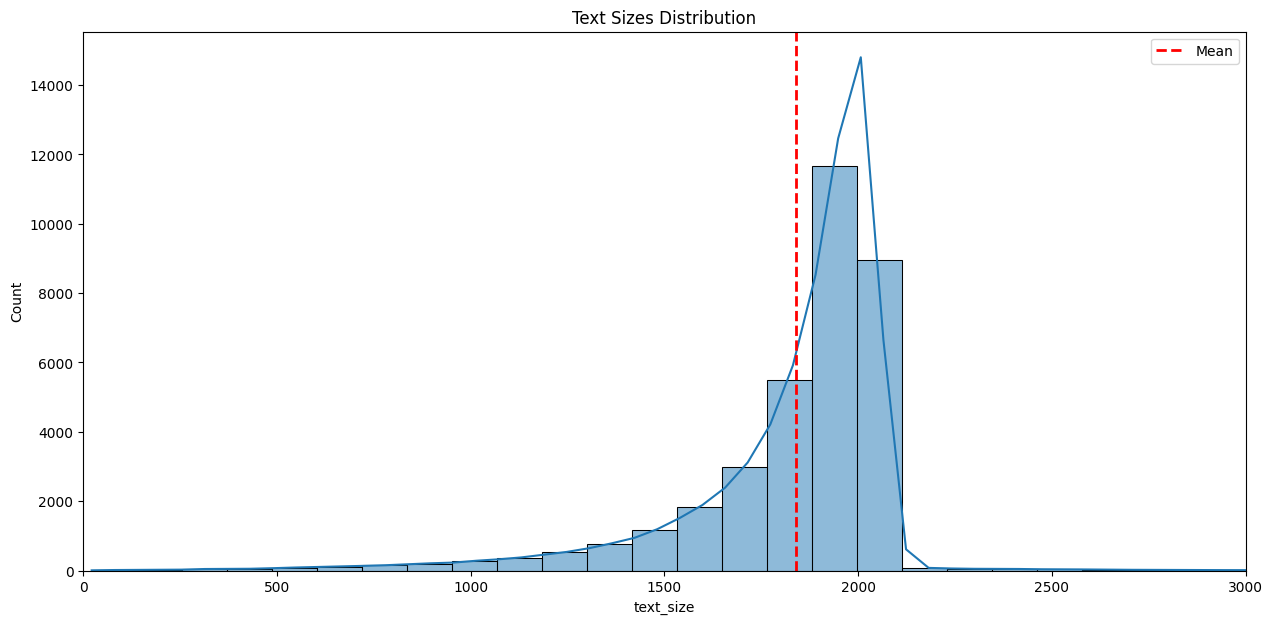

In [ ]:
# Plot distribution of size
plt.figure(figsize=(15,7))
sns.histplot(train_data['text_size'], bins=100, kde=True) # Increased the number of bins to 100
plt.axvline(train_data['text_size'].mean(), color='r', linestyle='dashed', label='Mean', linewidth=2)
plt.legend()
plt.title("Text Sizes Distribution")
plt.xlim(0, 3000) # Set x-axis limits to focus on a specific range
plt.show()

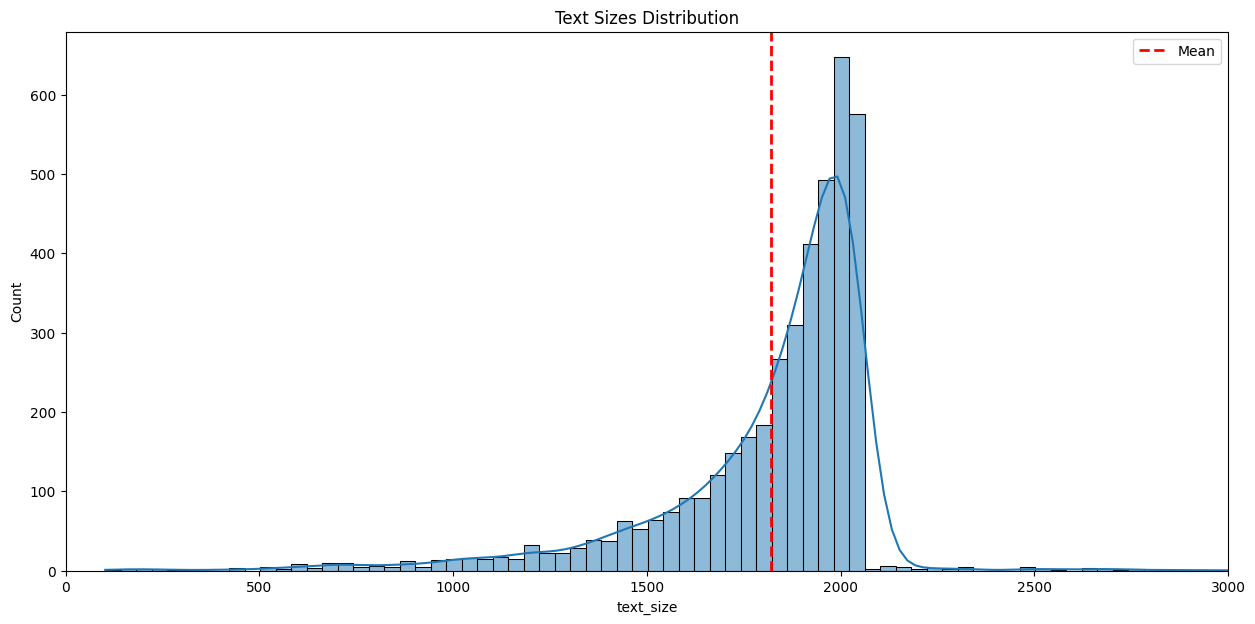

In [14]:
# Plot distribution of size
plt.figure(figsize=(15,7))
sns.histplot(valid_data['text_size'], bins=100, kde=True) # Increased the number of bins to 100
plt.axvline(valid_data['text_size'].mean(), color='r', linestyle='dashed', label='Mean', linewidth=2)
plt.legend()
plt.title("Text Sizes Distribution")
plt.xlim(0, 3000) # Set x-axis limits to focus on a specific range
plt.show()

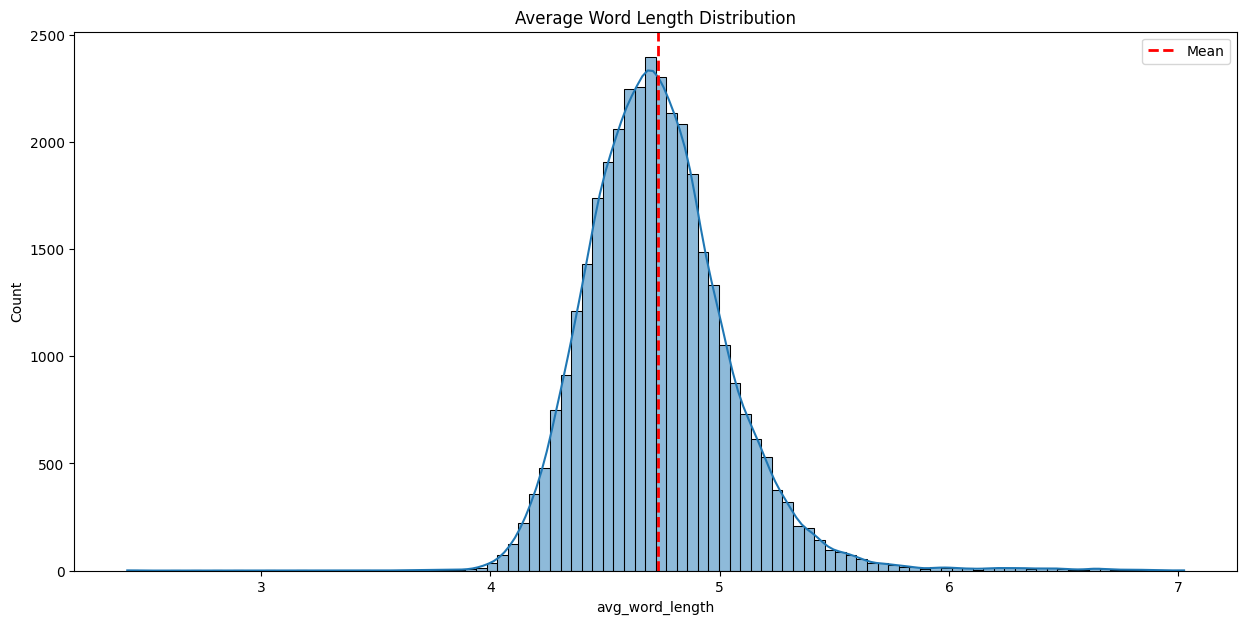

In [ ]:
# Plot distribution of size
plt.figure(figsize=(15,7))
sns.histplot(train_data['avg_word_length'], bins=100, kde=True) # Increased the number of bins to 100
plt.axvline(train_data['avg_word_length'].mean(), color='r', linestyle='dashed', label='Mean', linewidth=2)
plt.legend()
plt.title("Average Word Length Distribution")
plt.show()

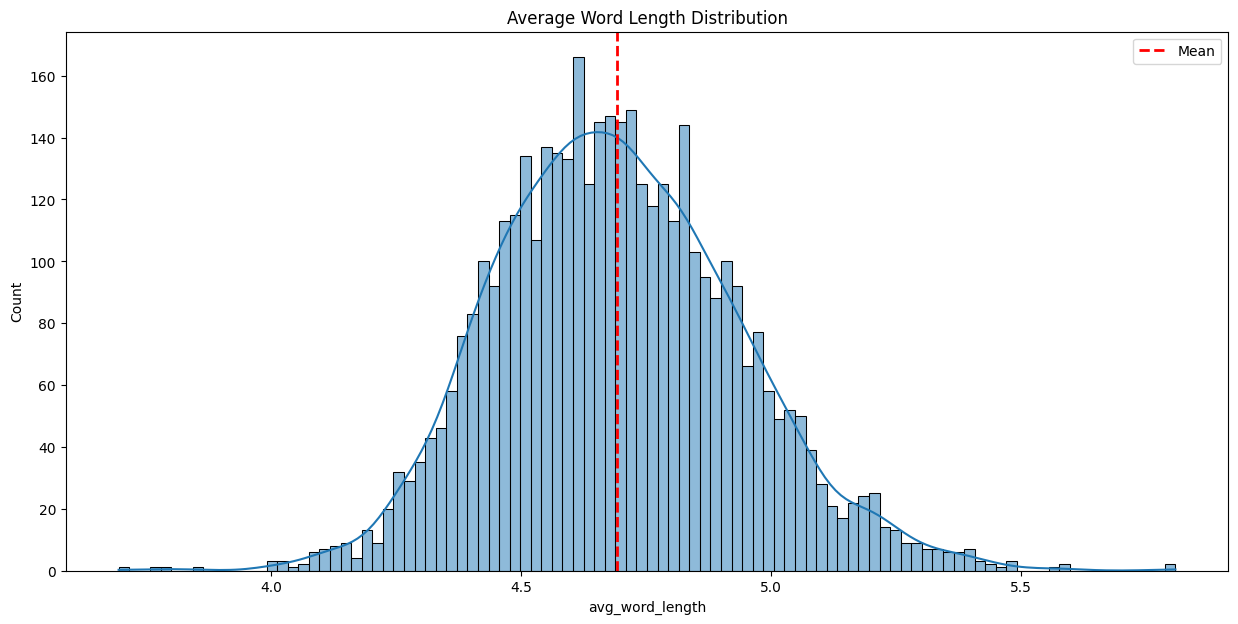

In [15]:
# Plot distribution of size
plt.figure(figsize=(15,7))
sns.histplot(valid_data['avg_word_length'], bins=100, kde=True) # Increased the number of bins to 100
plt.axvline(valid_data['avg_word_length'].mean(), color='r', linestyle='dashed', label='Mean', linewidth=2)
plt.legend()
plt.title("Average Word Length Distribution")
plt.show()

## Group data by author

In [ ]:
grouped_by_author = train_data.groupby('author')
len(grouped_by_author)

In [18]:
valid_grouped_by_author = valid_data.groupby('author')
len(valid_grouped_by_author)

21

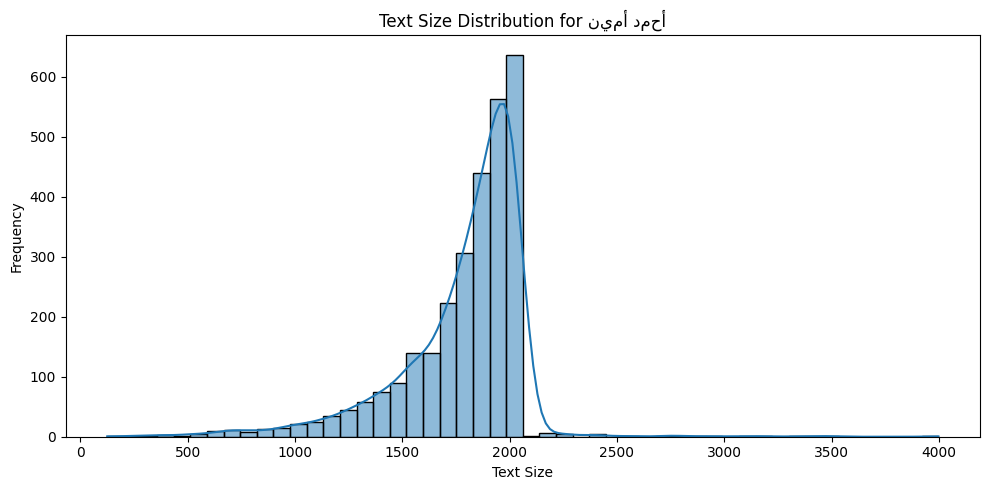

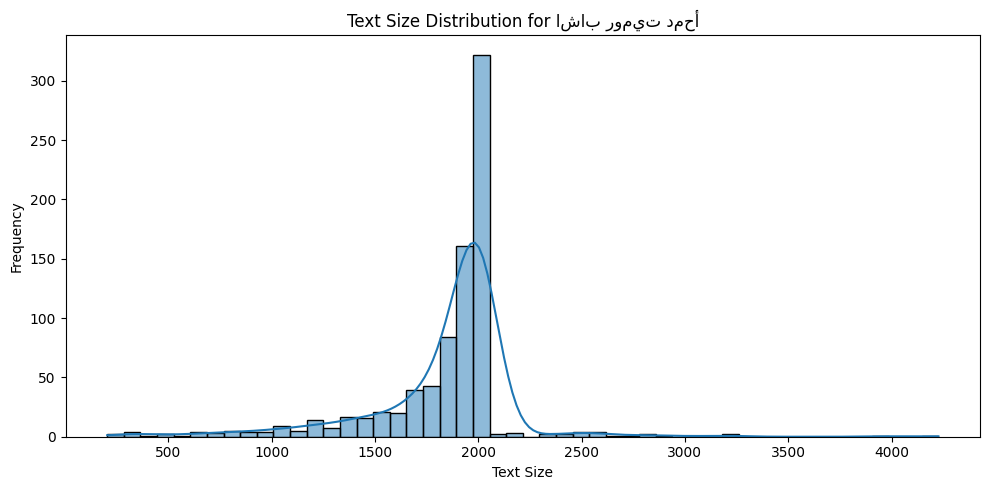

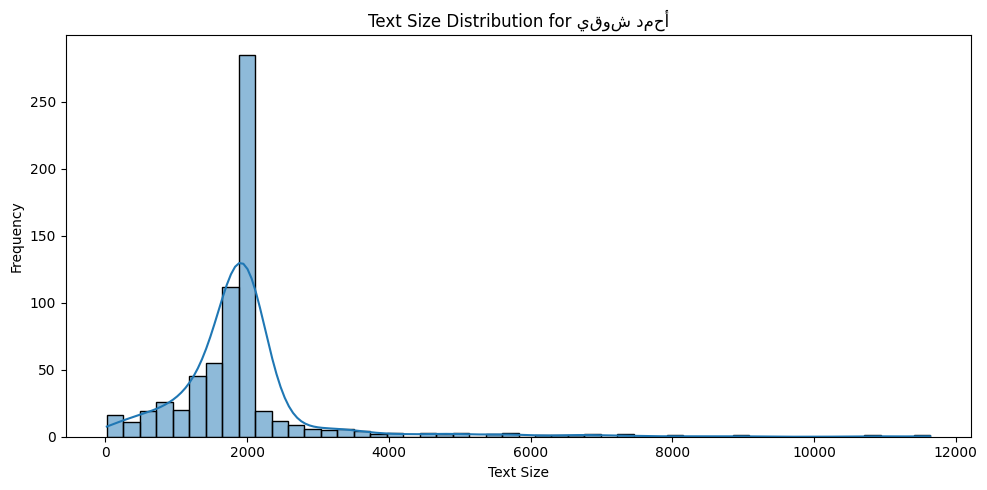

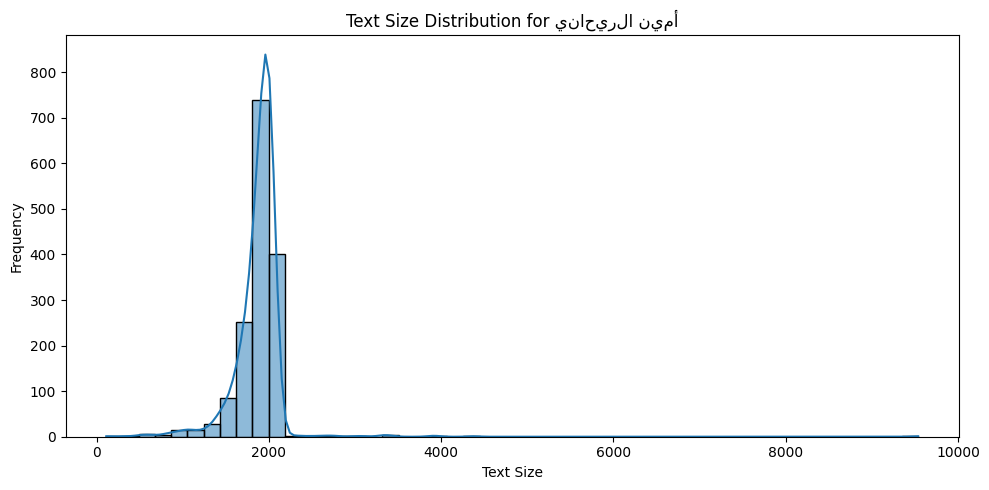

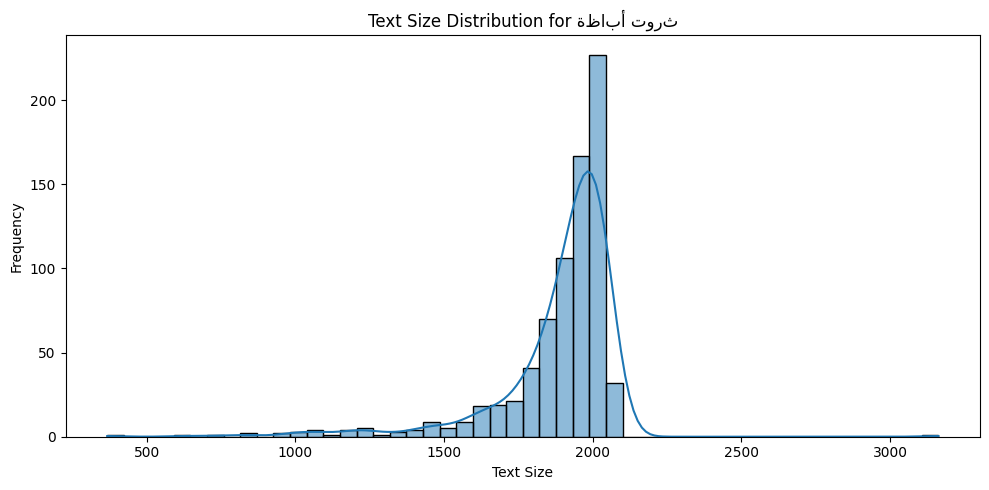

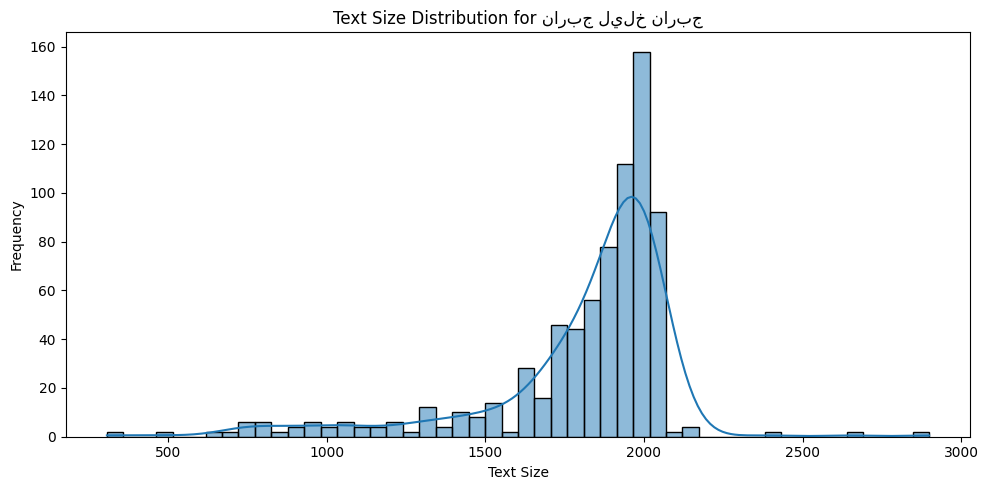

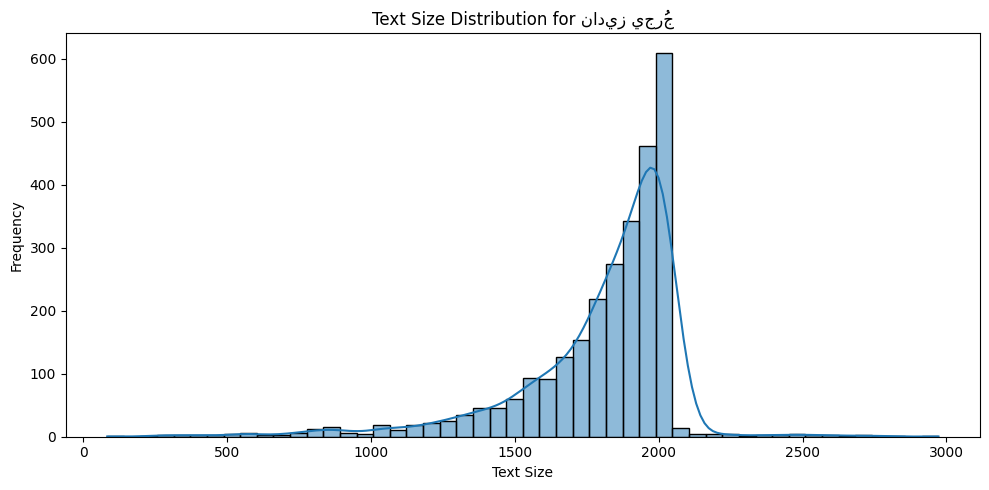

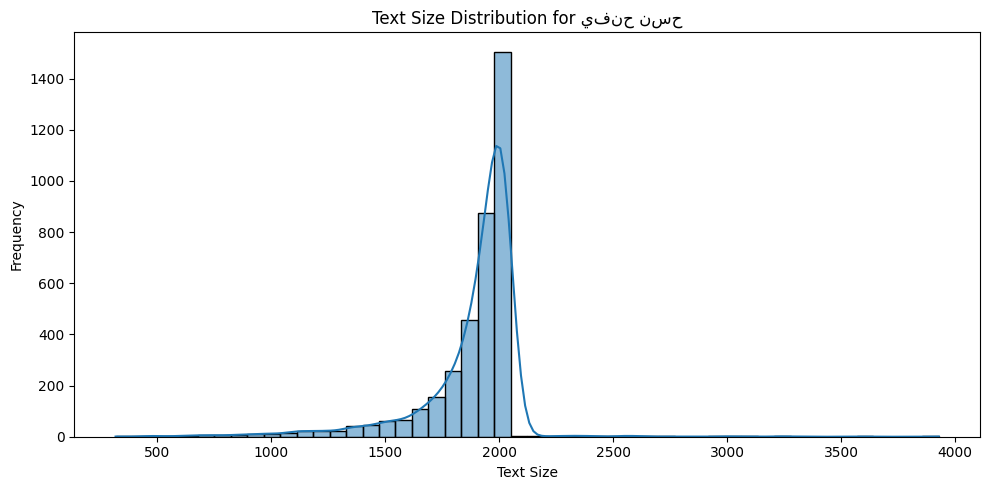

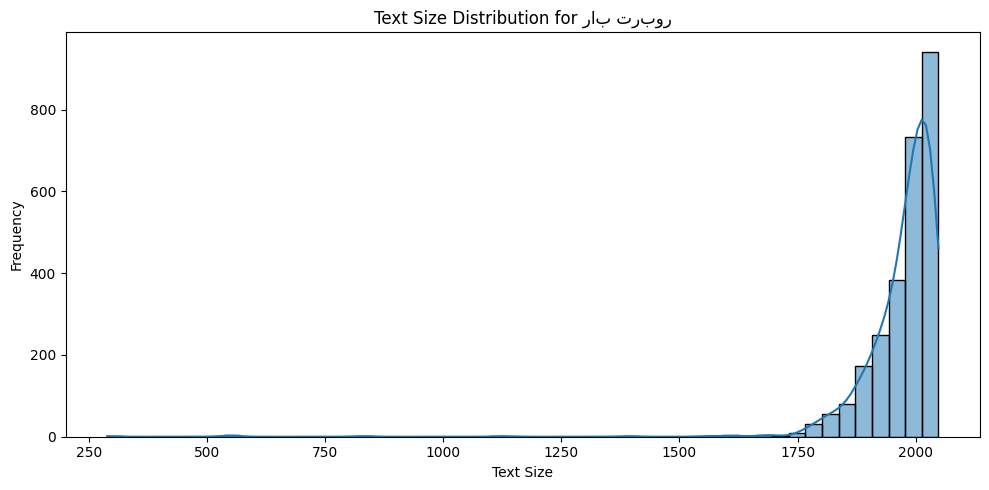

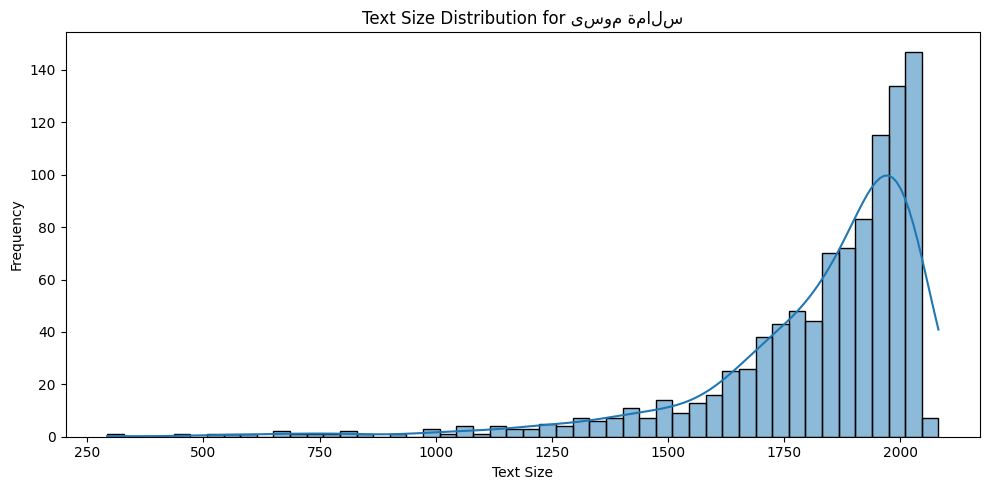

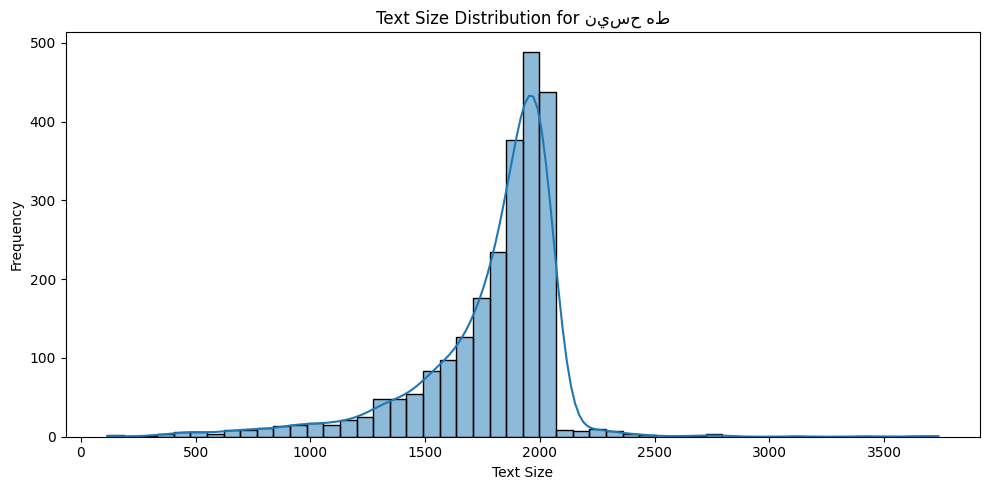

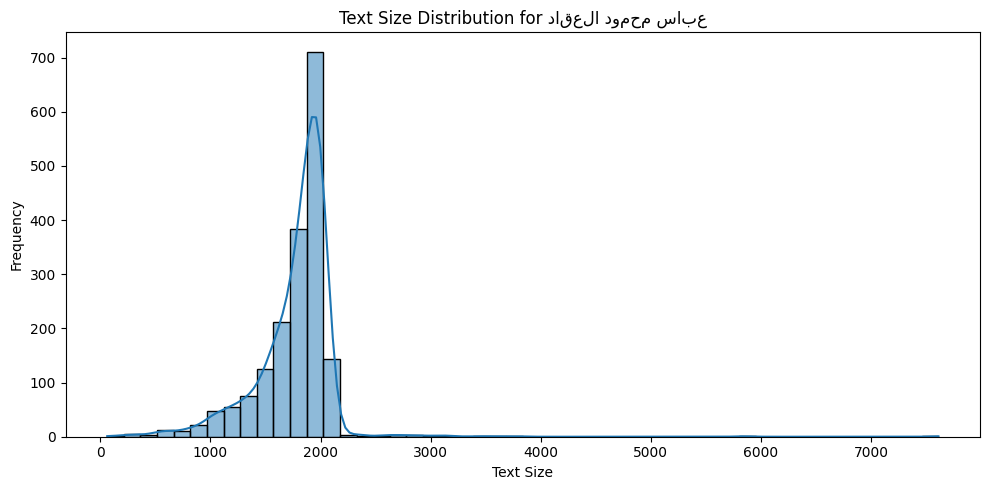

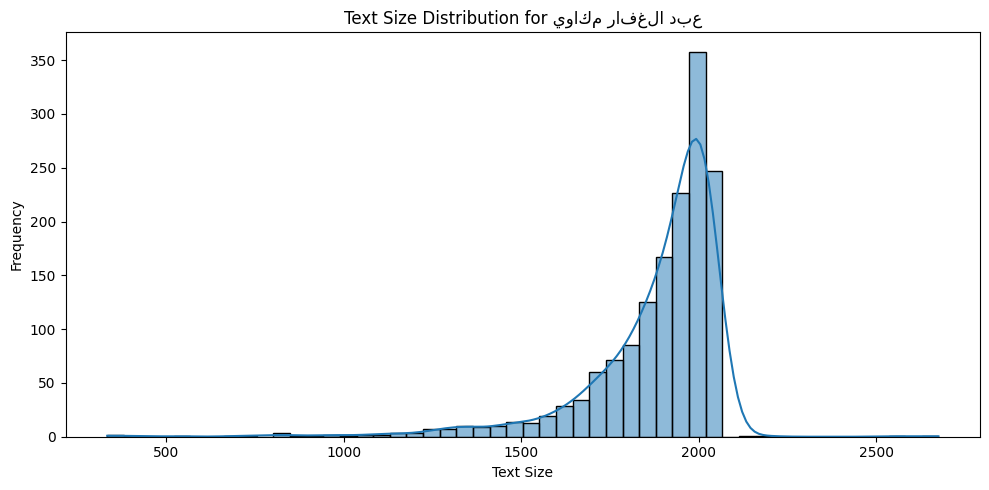

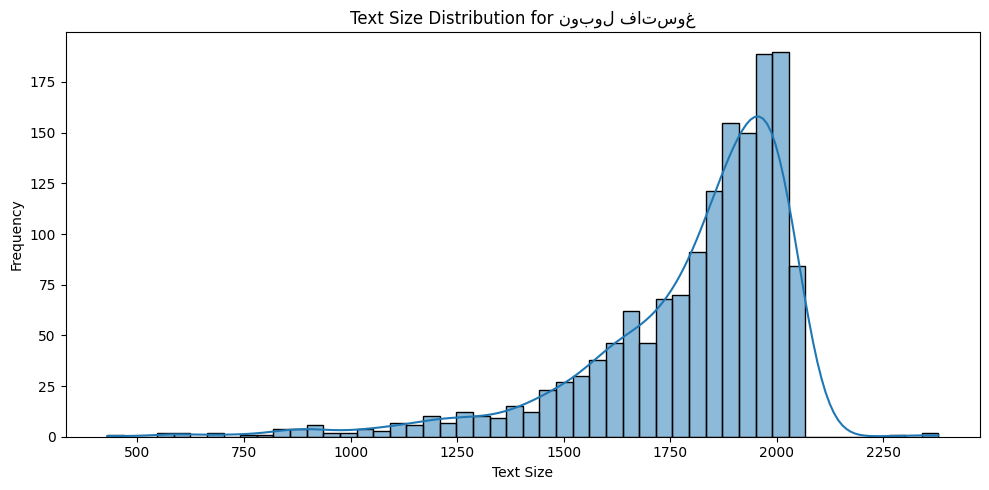

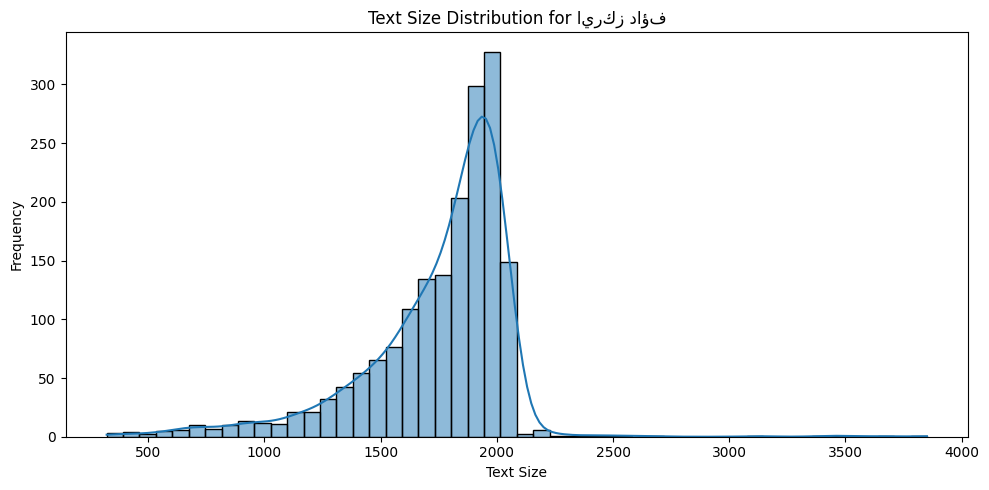

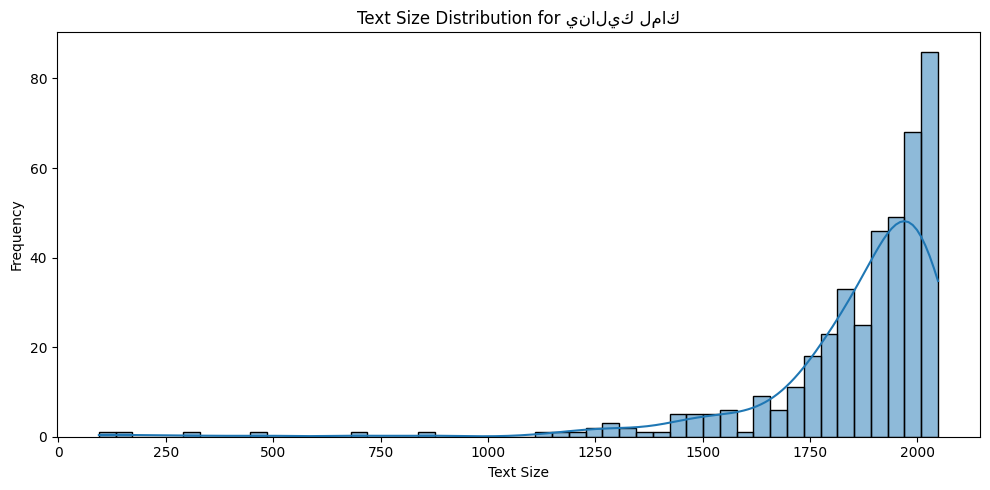

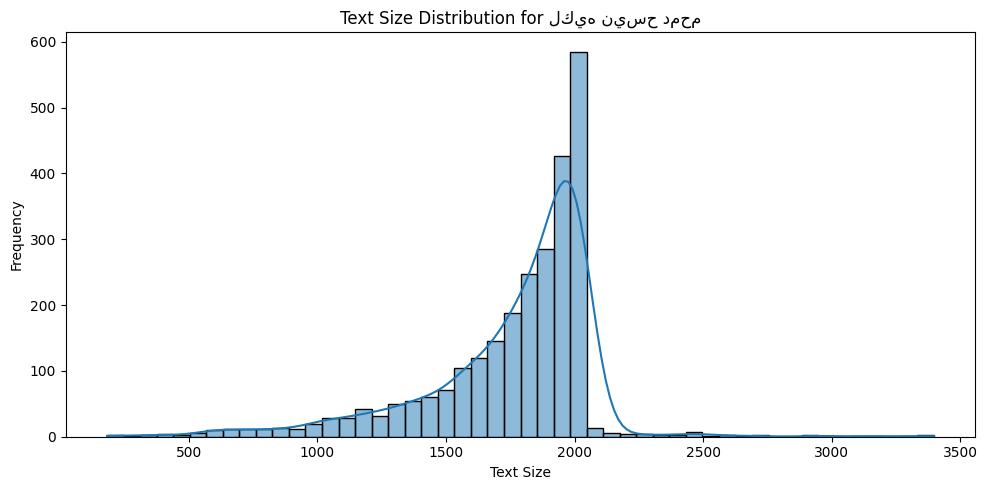

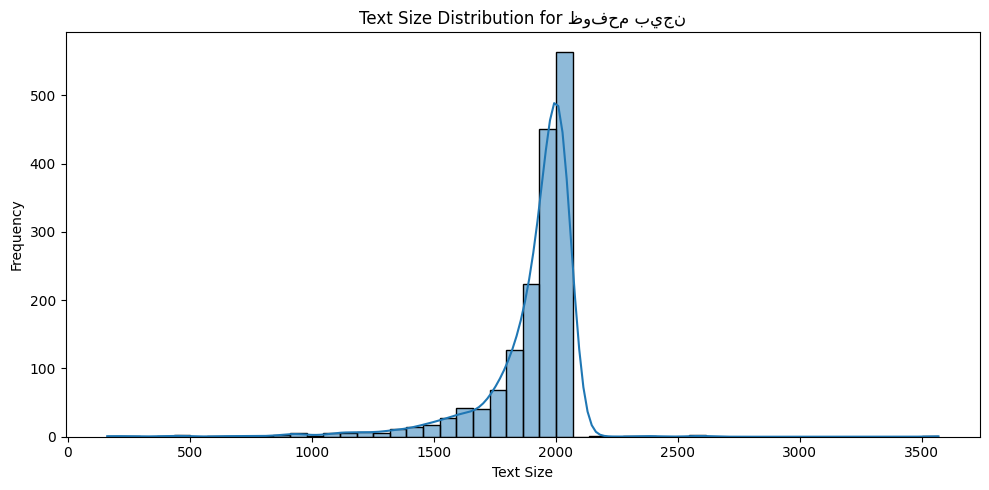

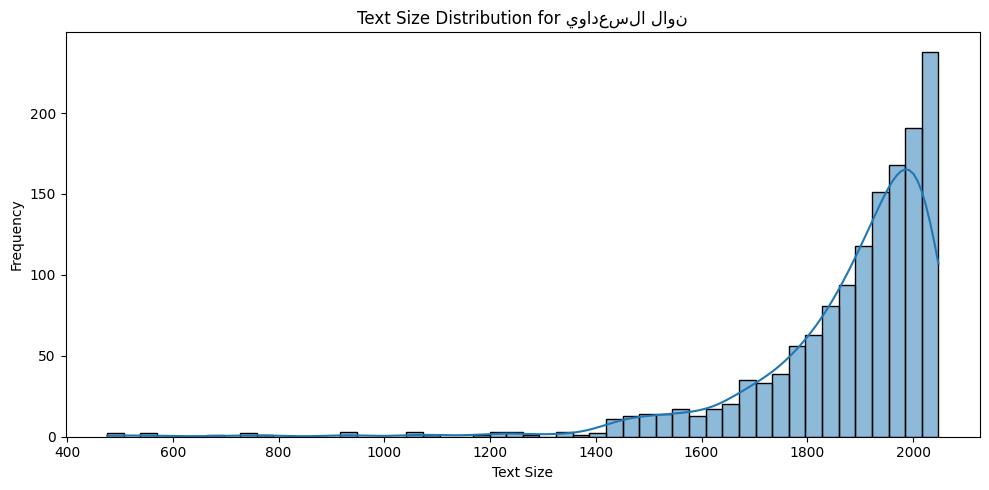

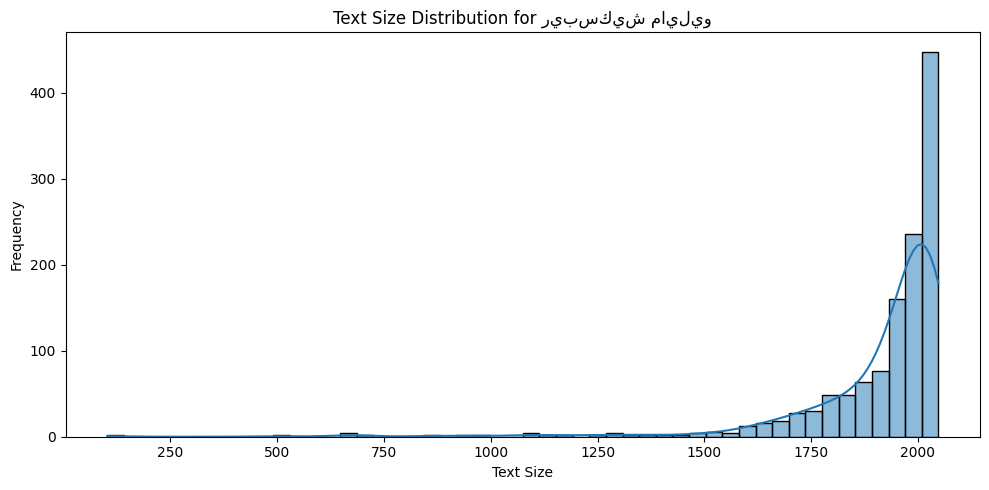

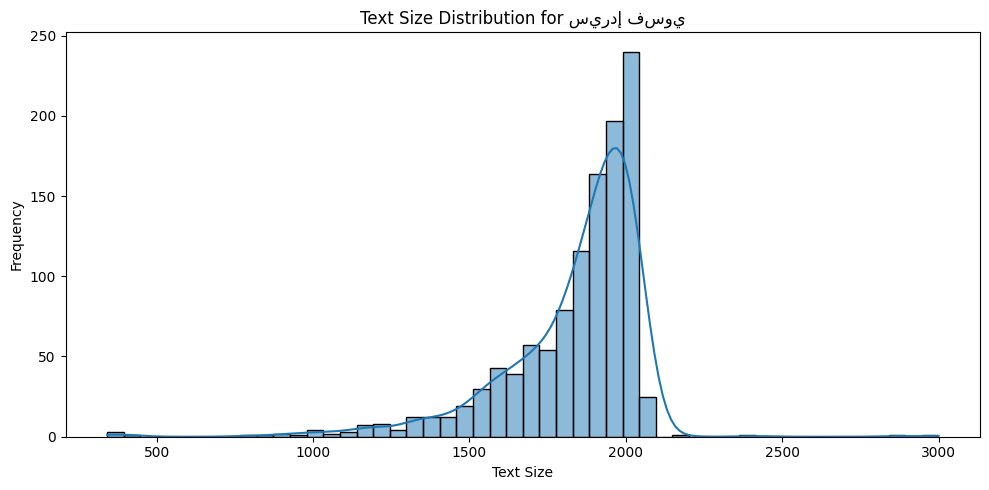

In [ ]:
for author_name, author_df in grouped_by_author:
    plt.figure(figsize=(10, 5))
    sns.histplot(author_df['text_size'], bins=50, kde=True) # Increased the number of bins to 100
    names_rev_author = author_name[-1::-1]
    plt.title(f'Text Size Distribution for {names_rev_author}')
    plt.xlabel('Text Size')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

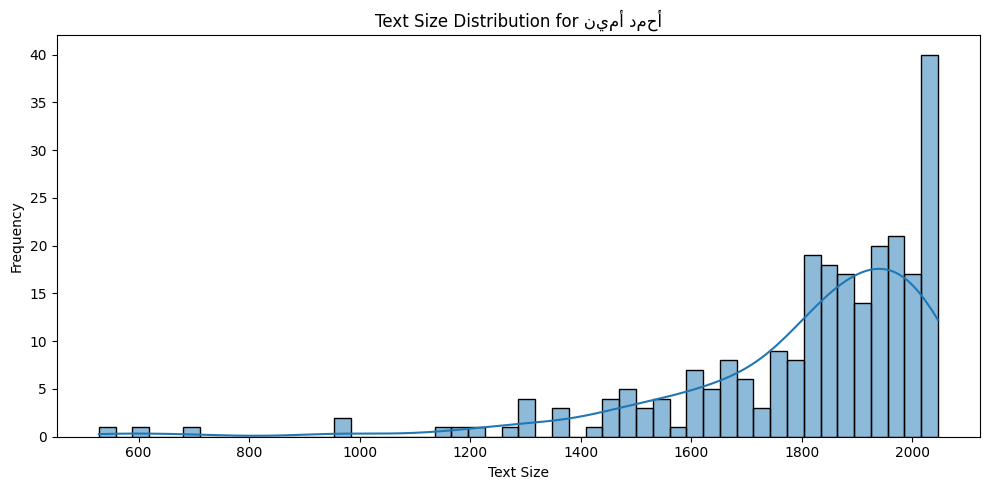

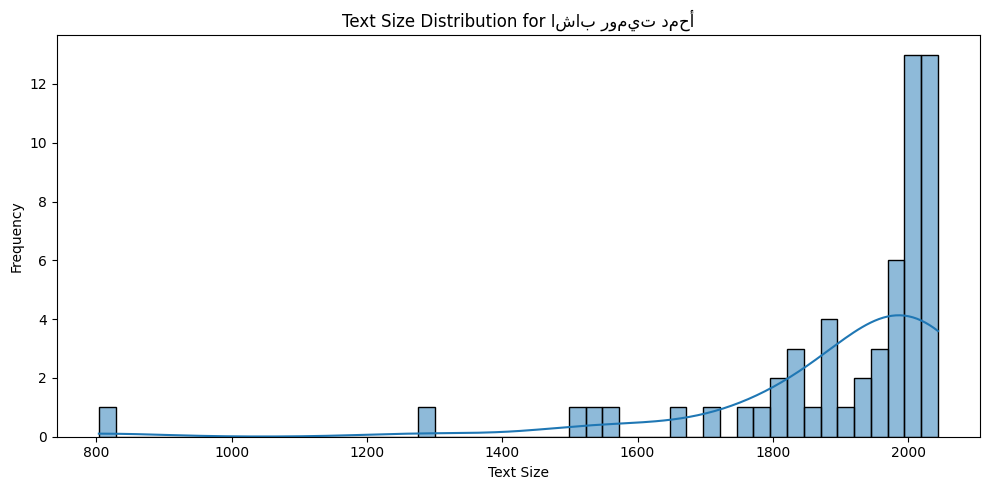

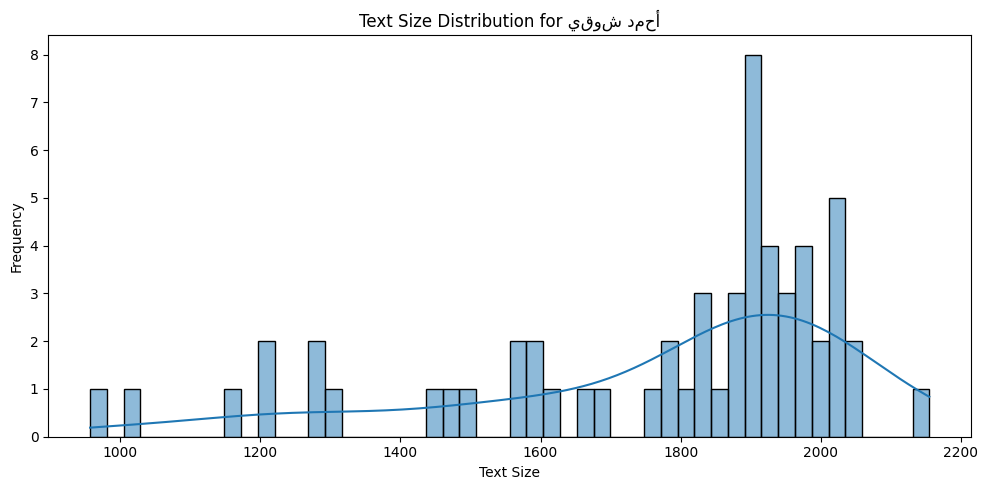

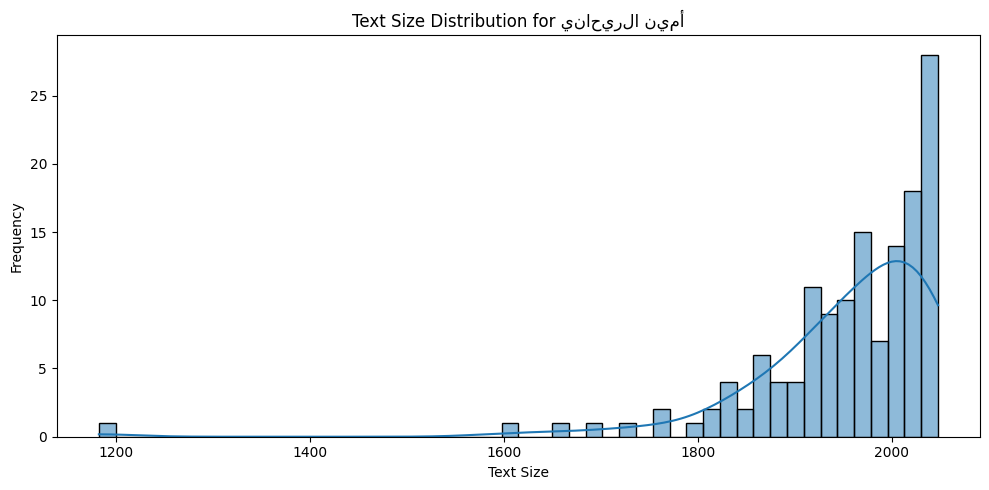

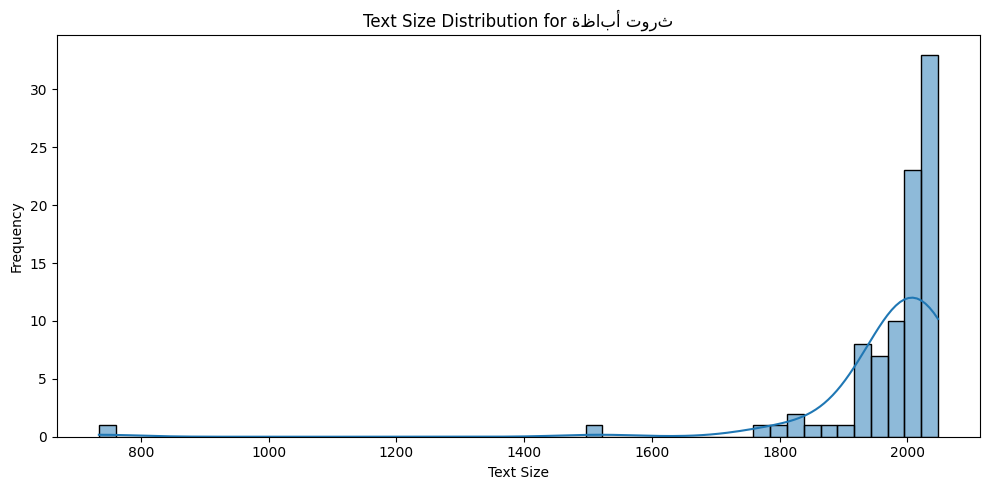

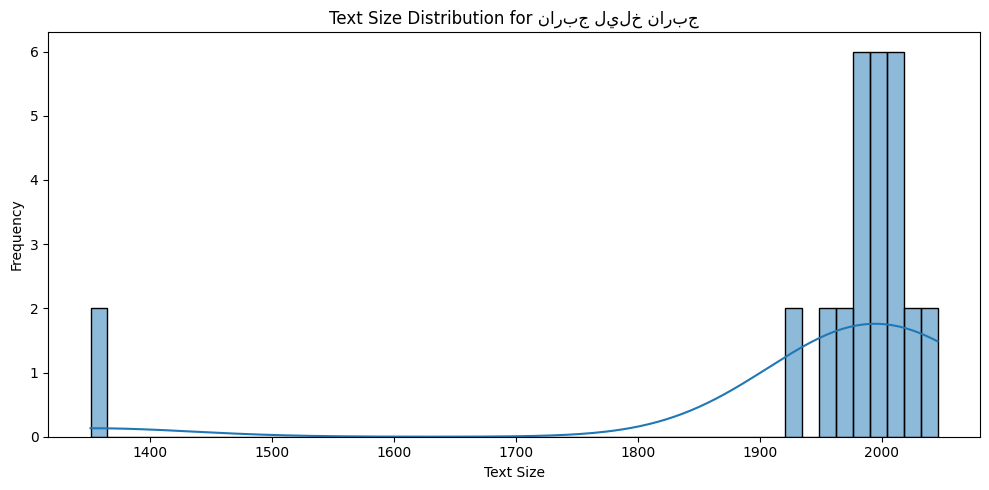

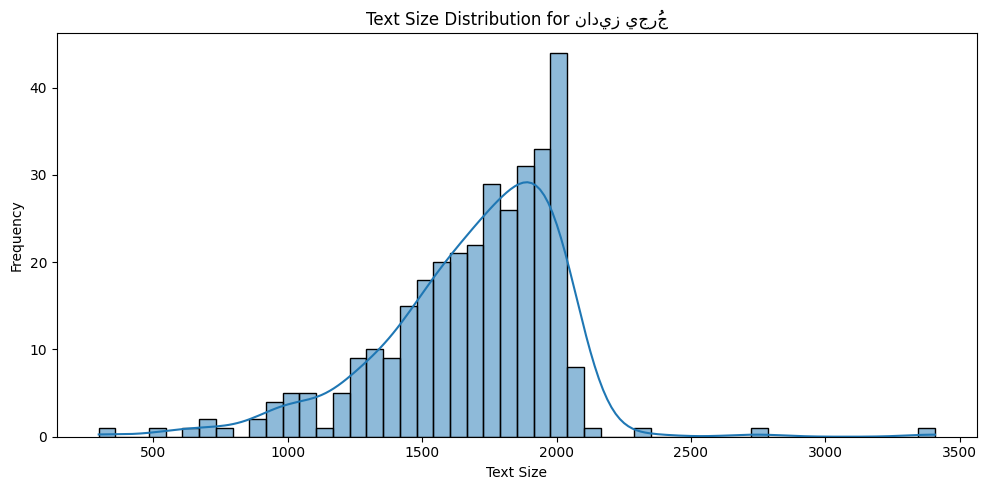

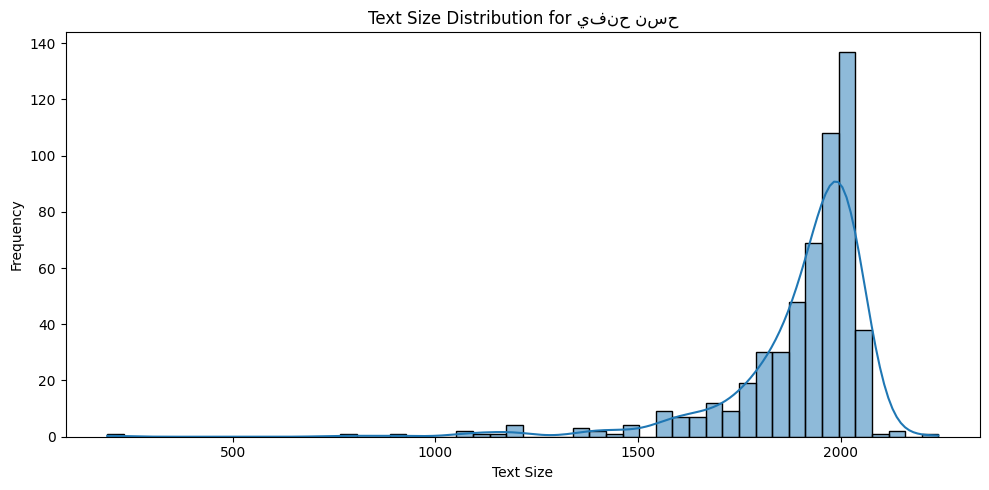

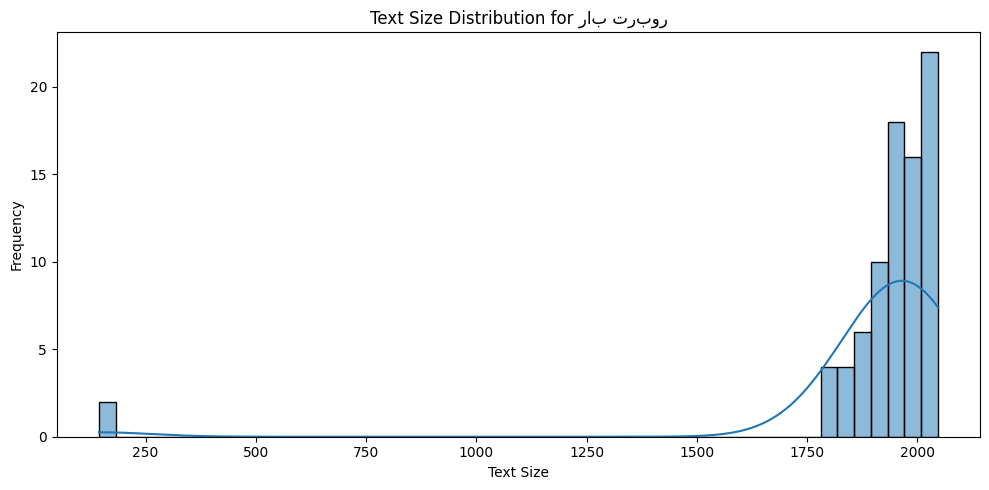

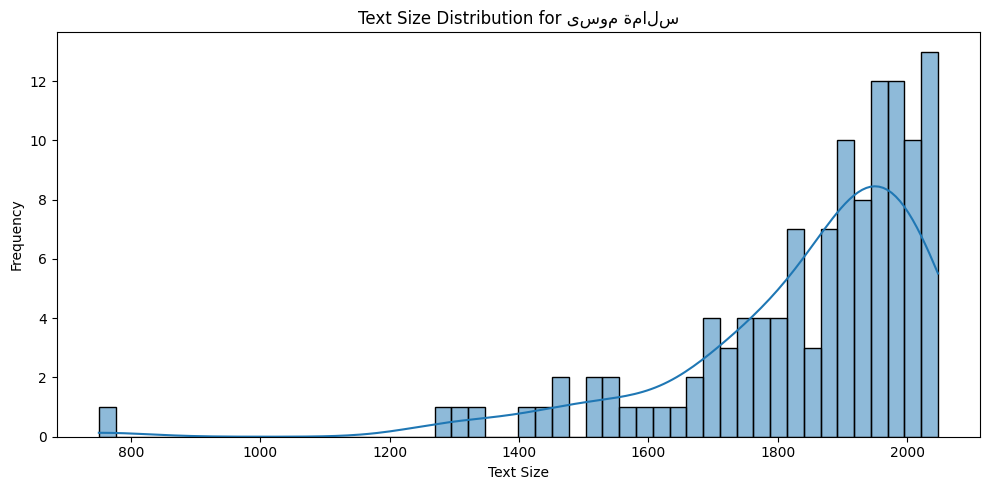

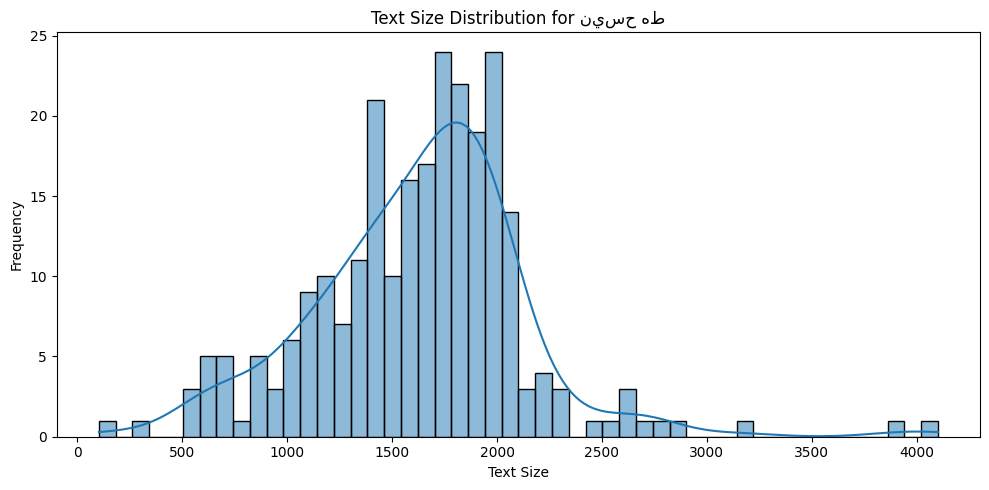

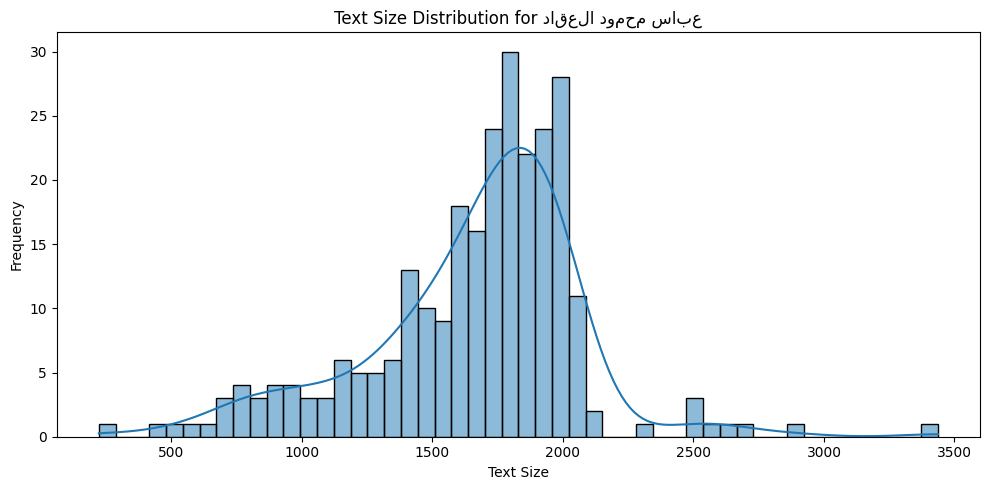

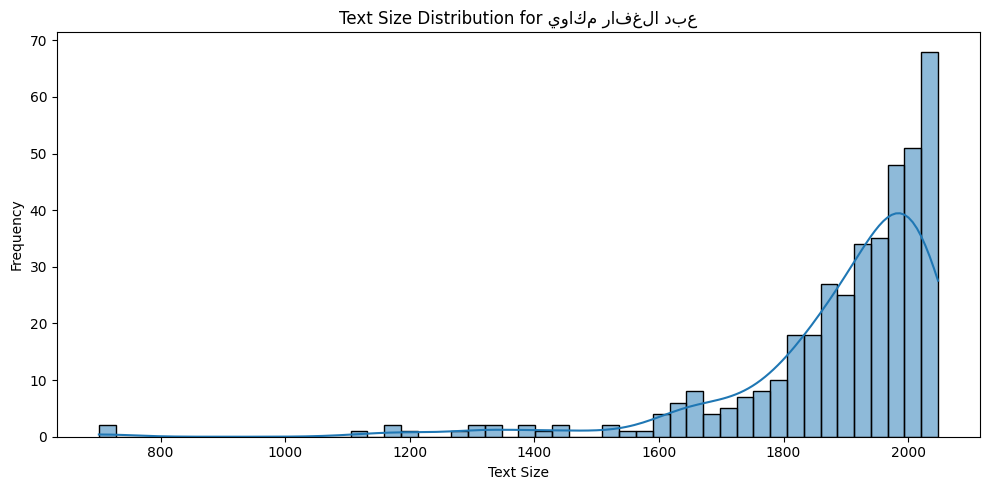

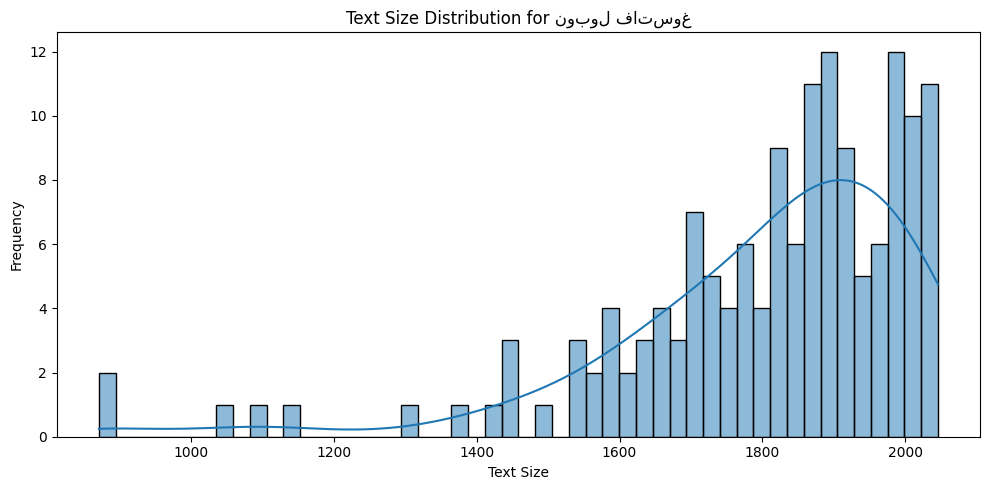

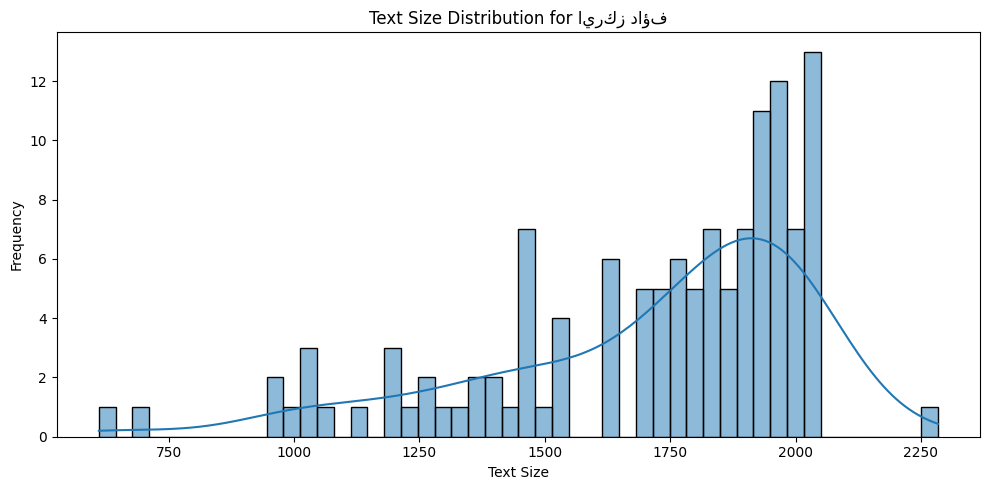

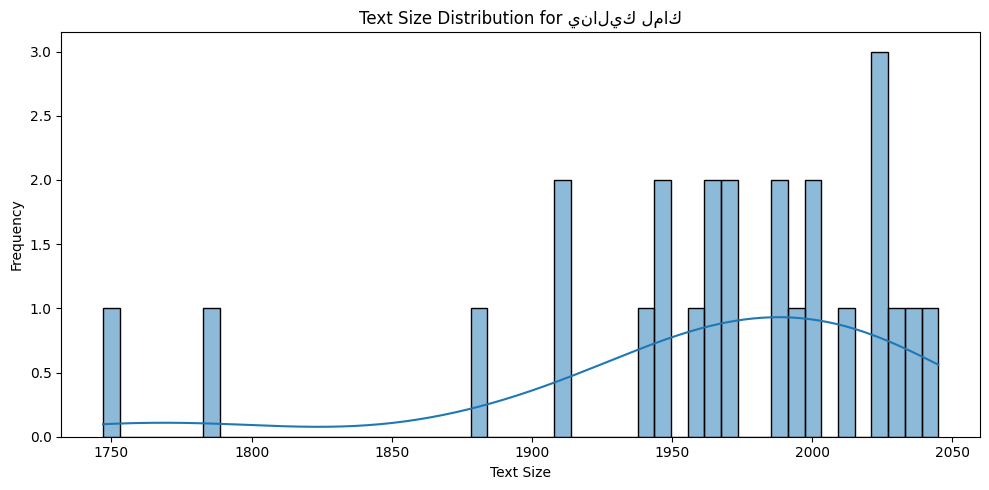

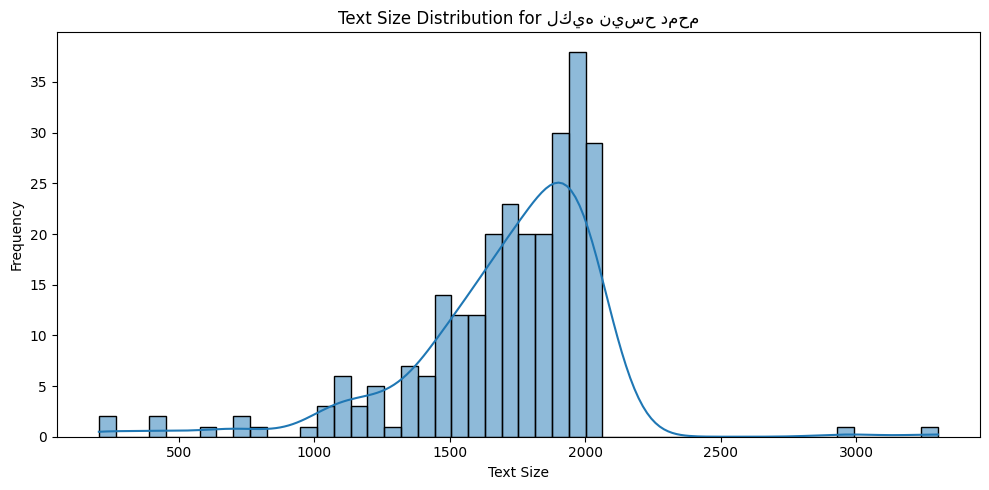

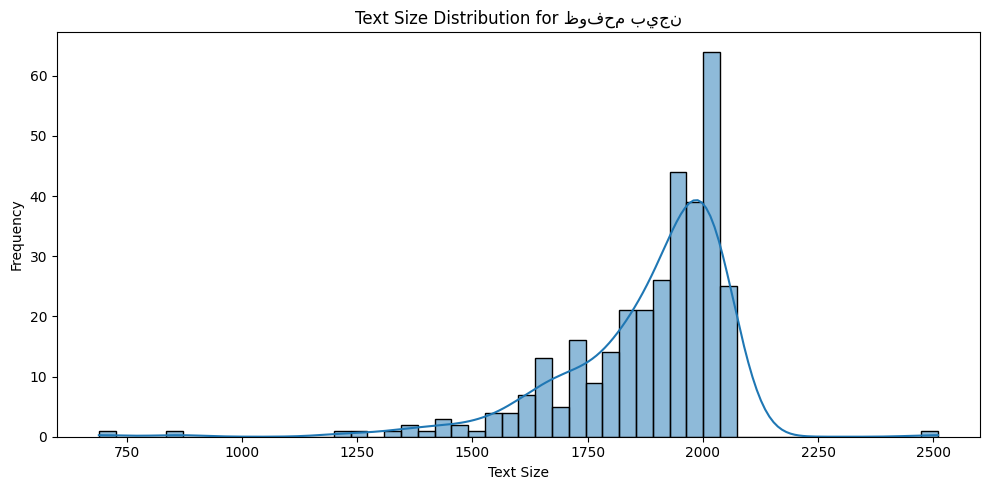

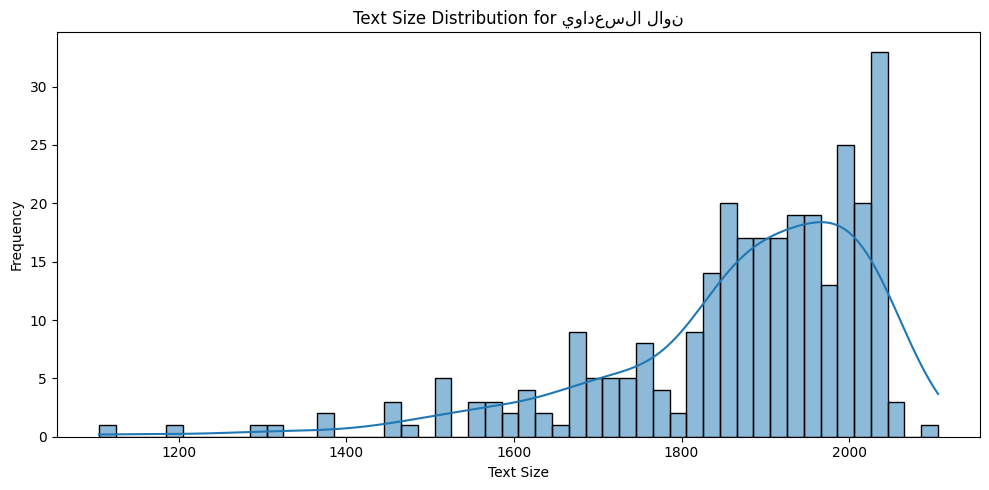

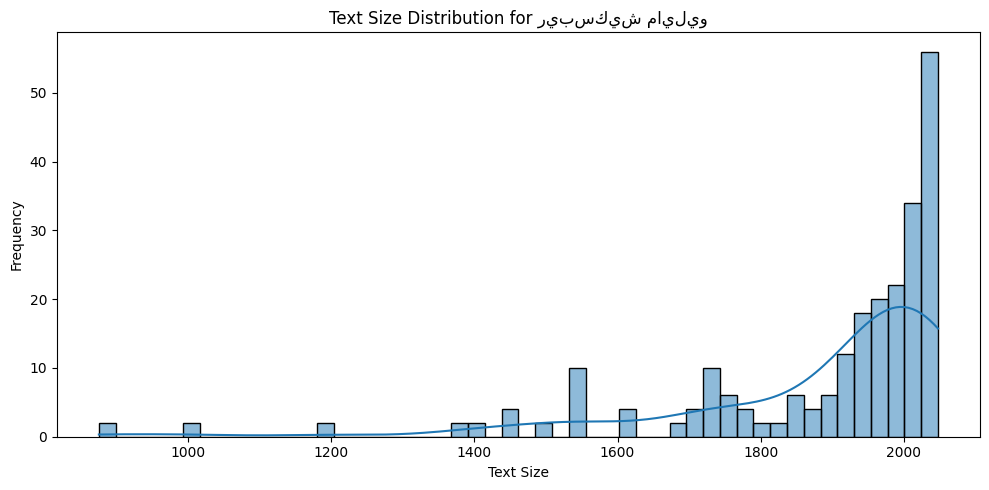

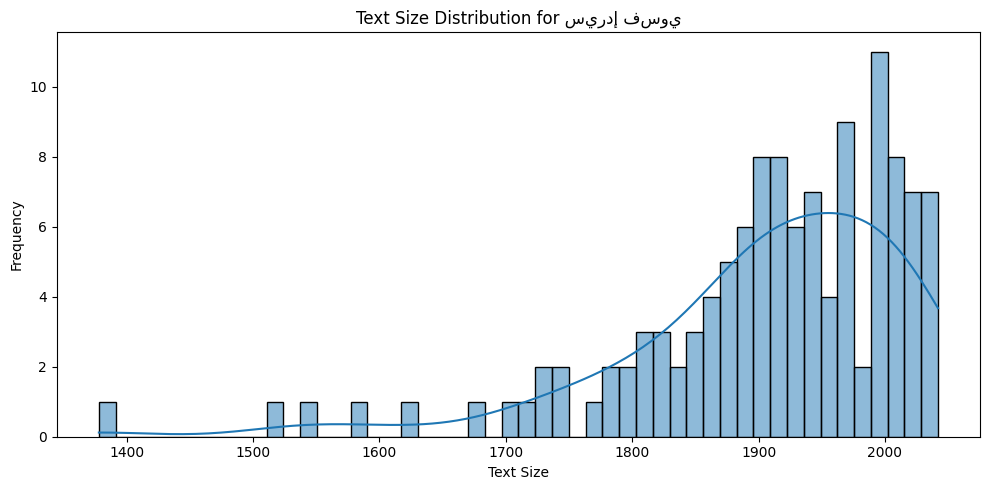

In [19]:
for author_name, author_df in valid_grouped_by_author:
    plt.figure(figsize=(10, 5))
    sns.histplot(author_df['text_size'], bins=50, kde=True) # Increased the number of bins to 100
    names_rev_author = author_name[-1::-1]
    plt.title(f'Text Size Distribution for {names_rev_author}')
    plt.xlabel('Text Size')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

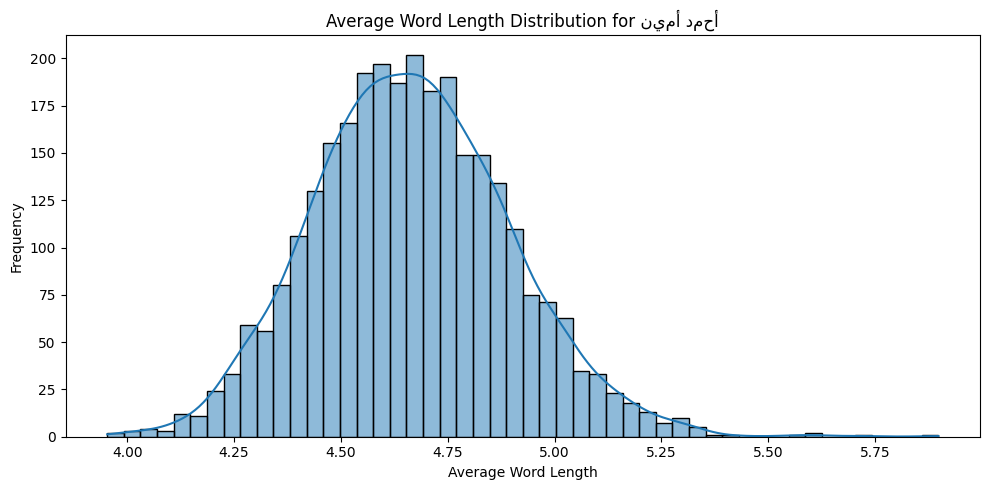

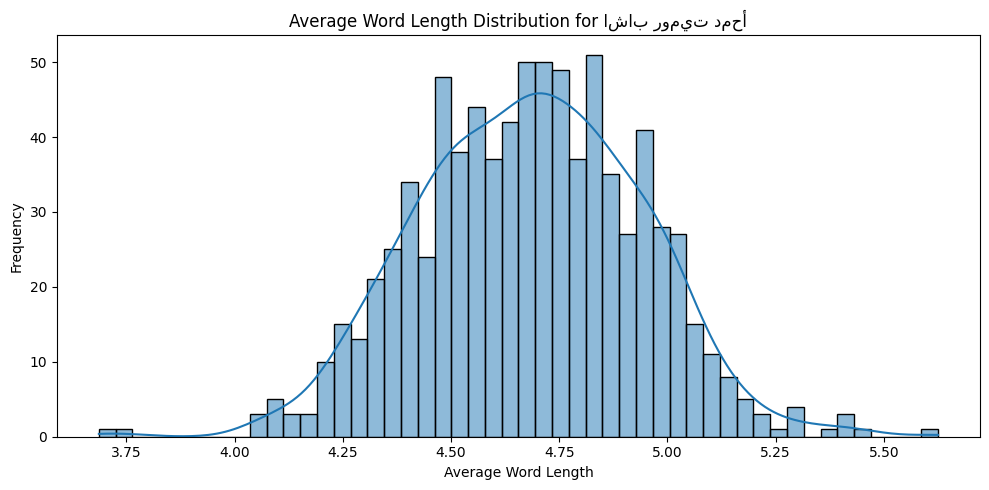

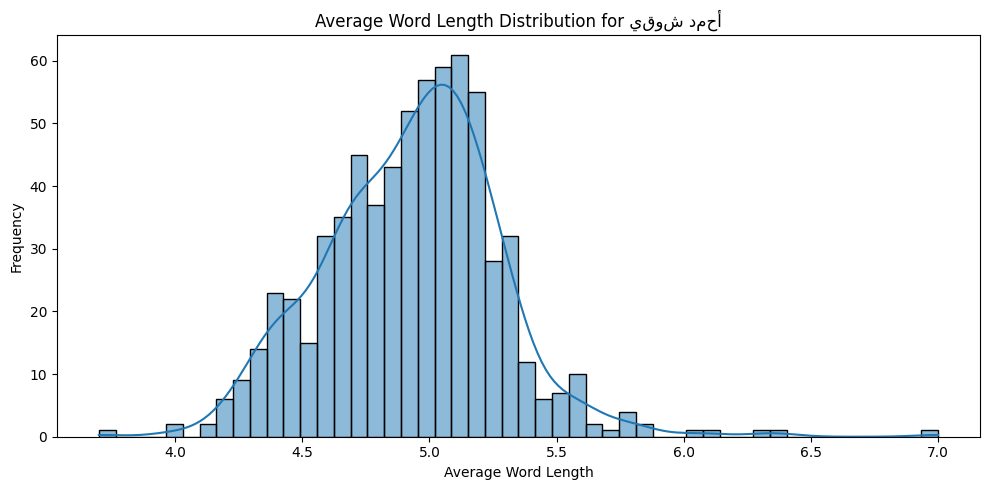

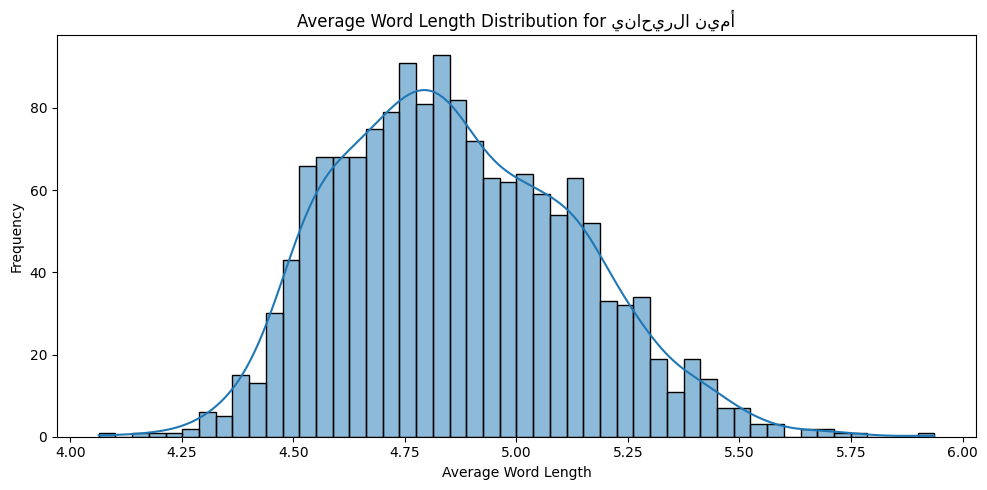

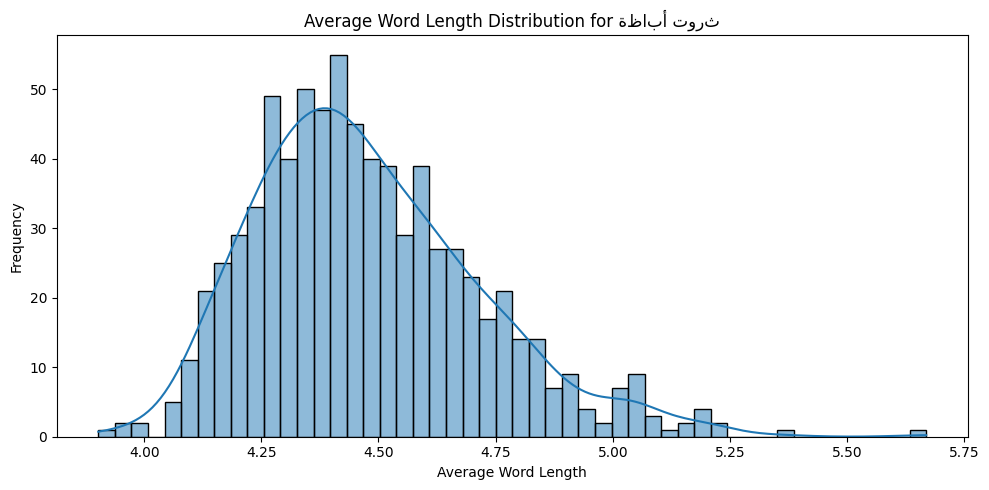

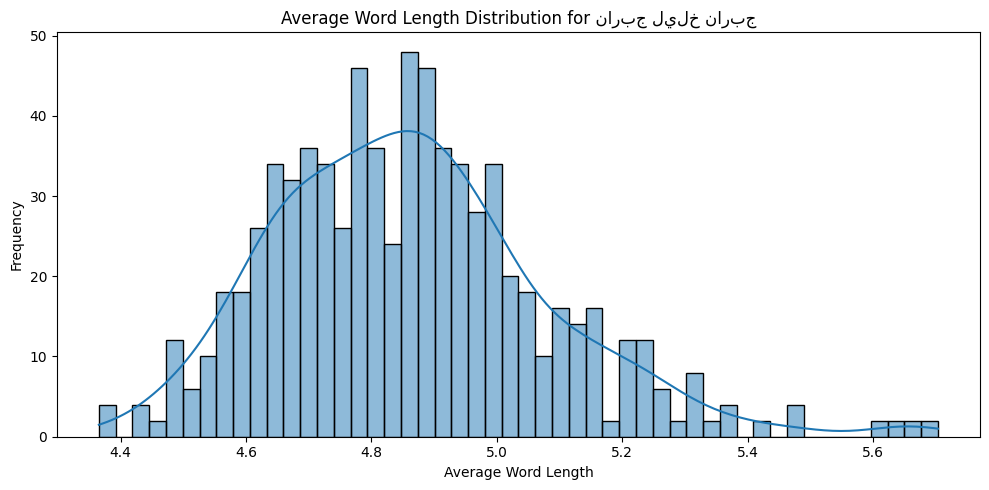

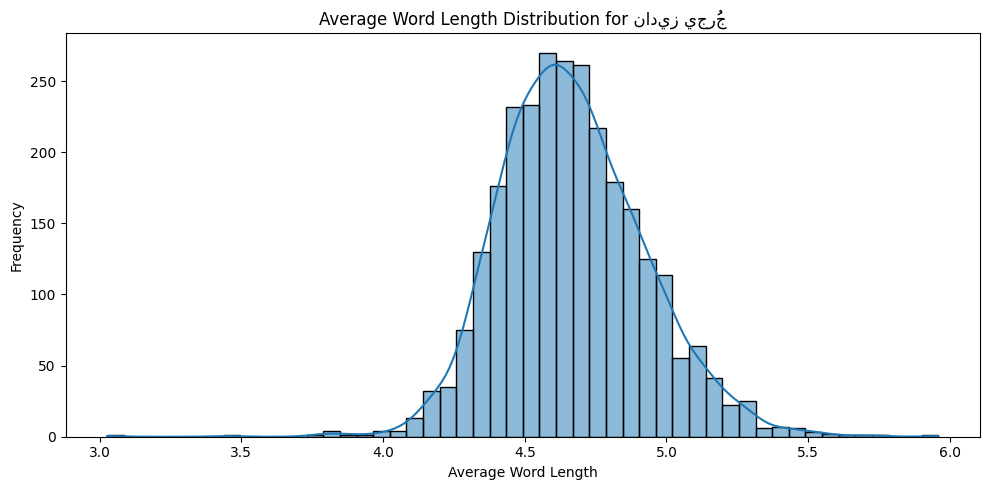

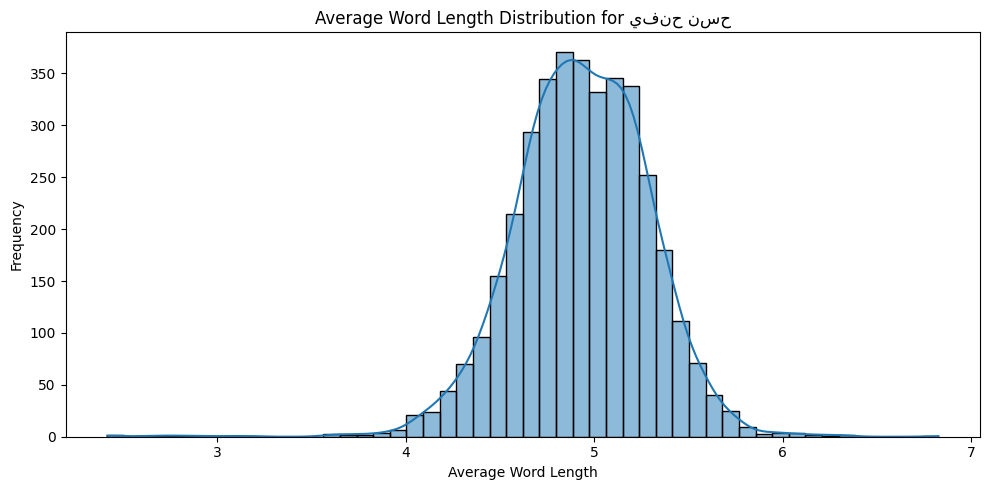

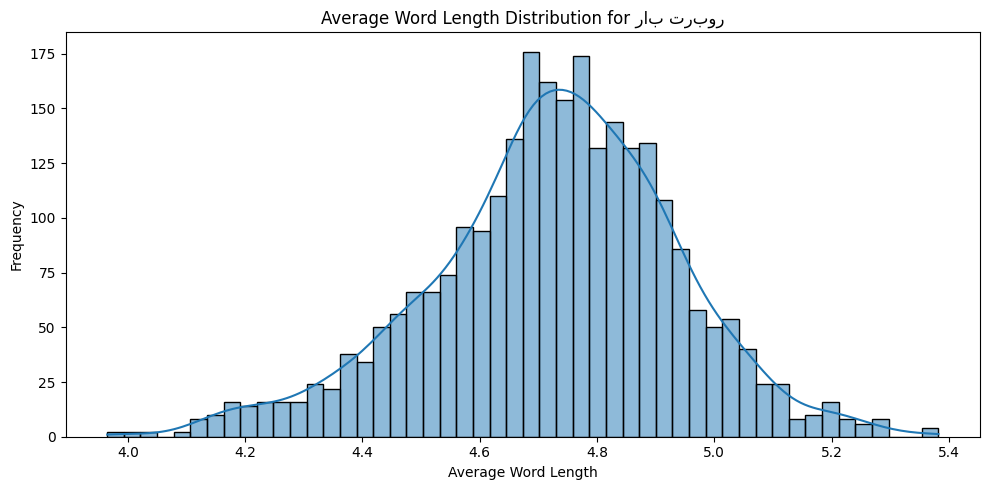

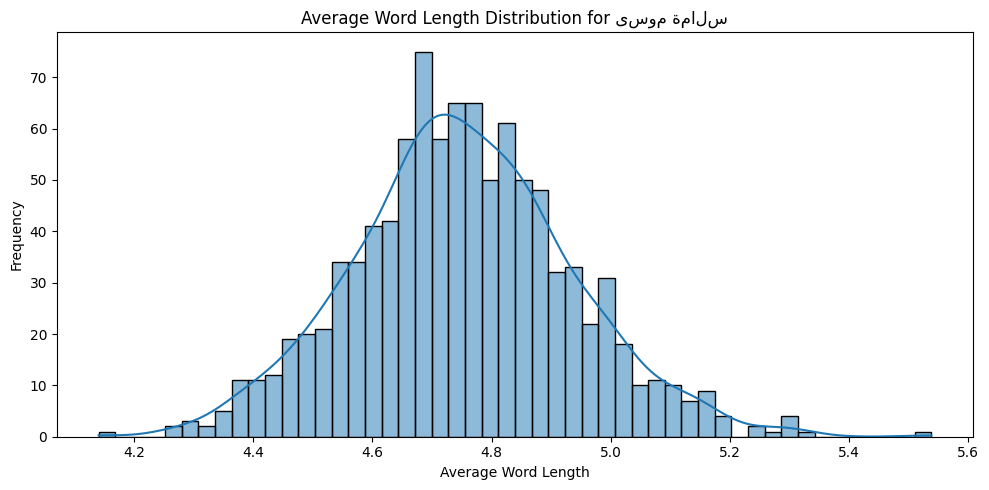

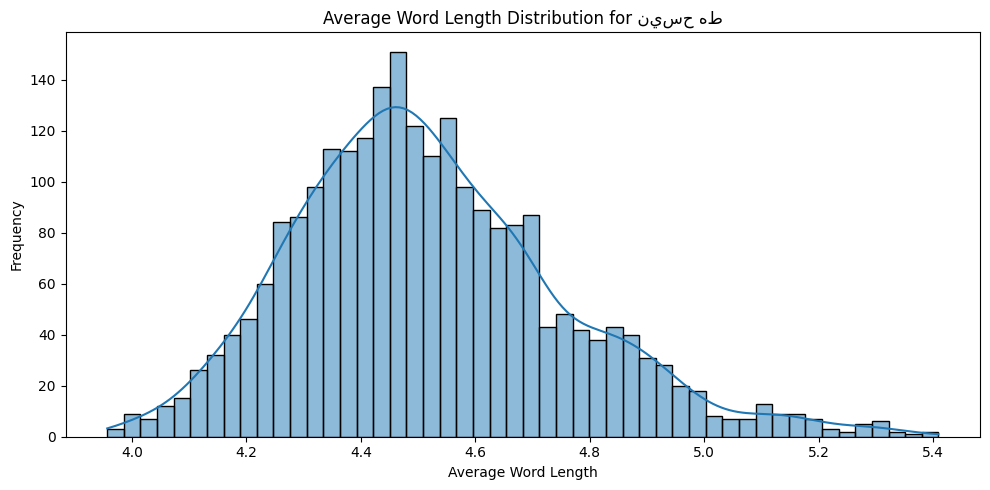

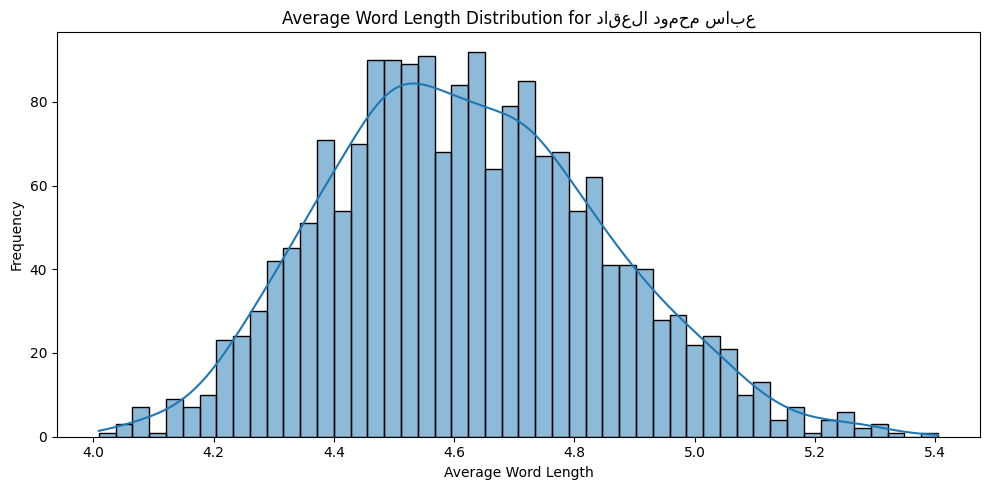

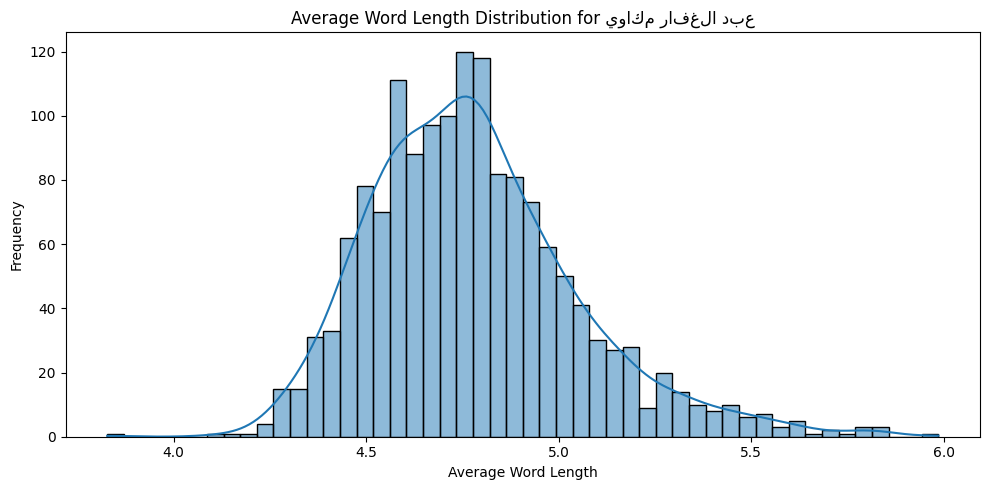

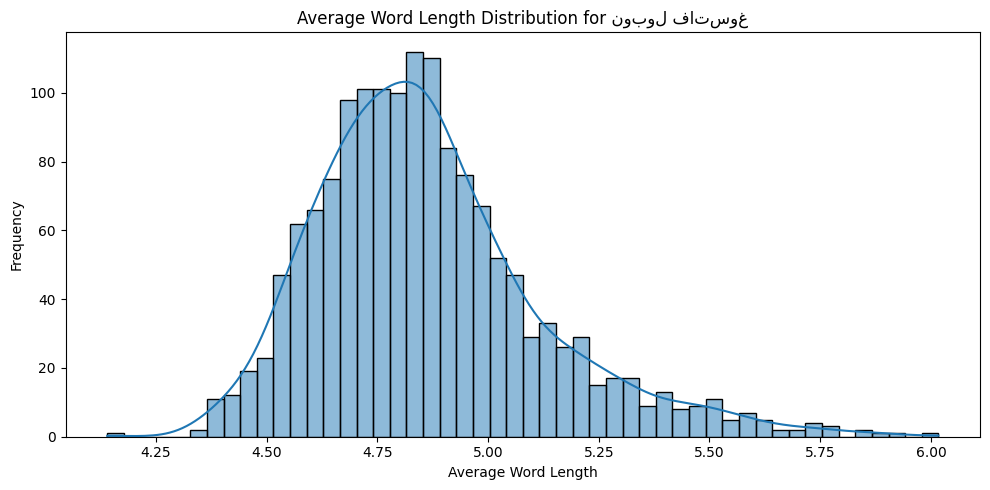

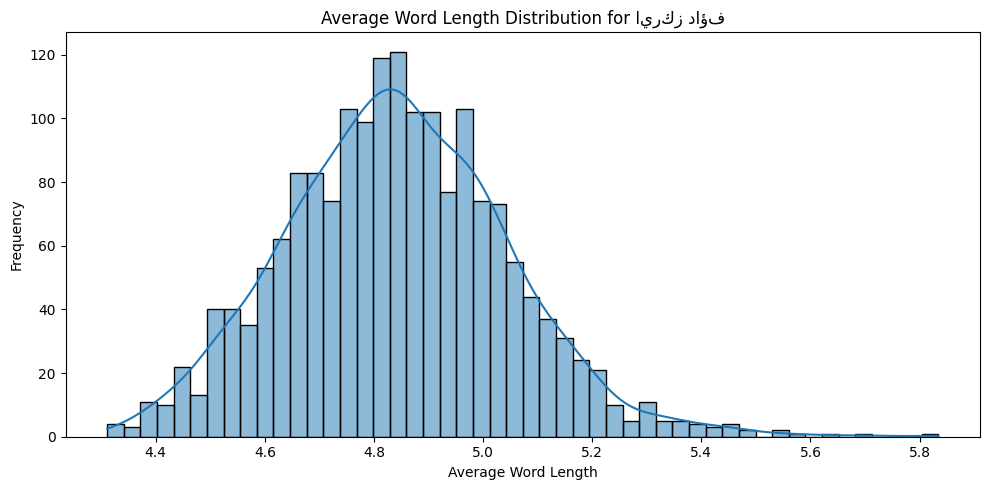

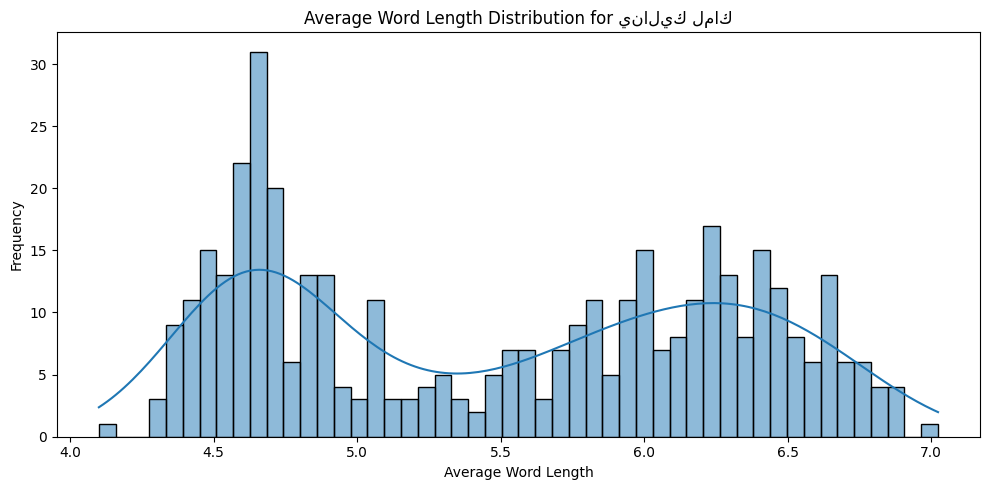

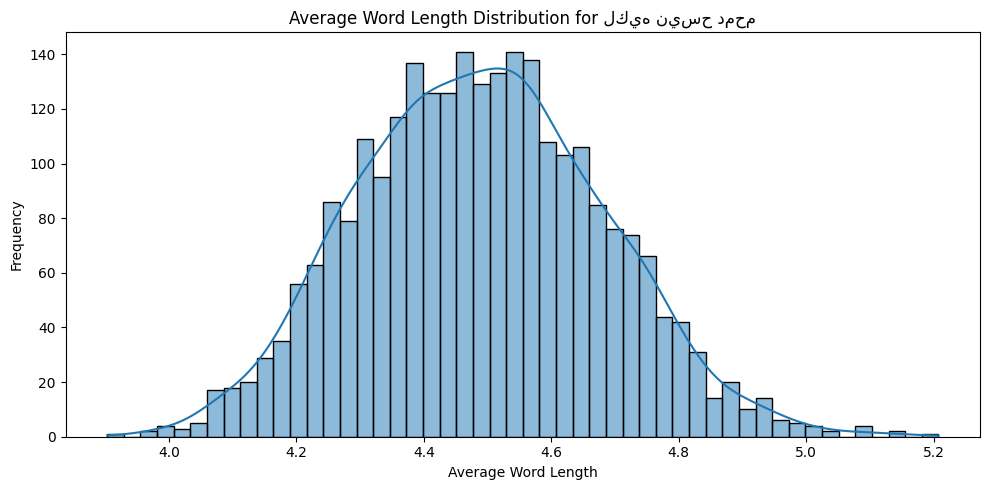

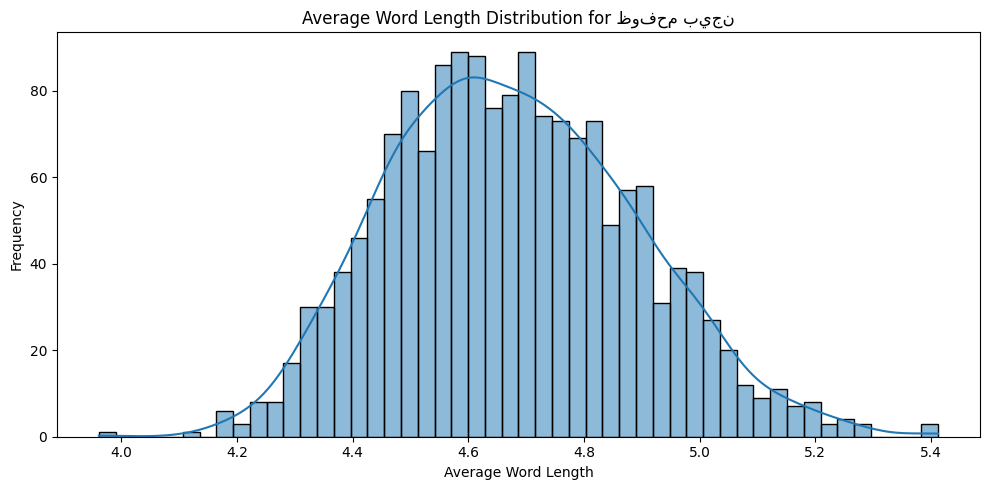

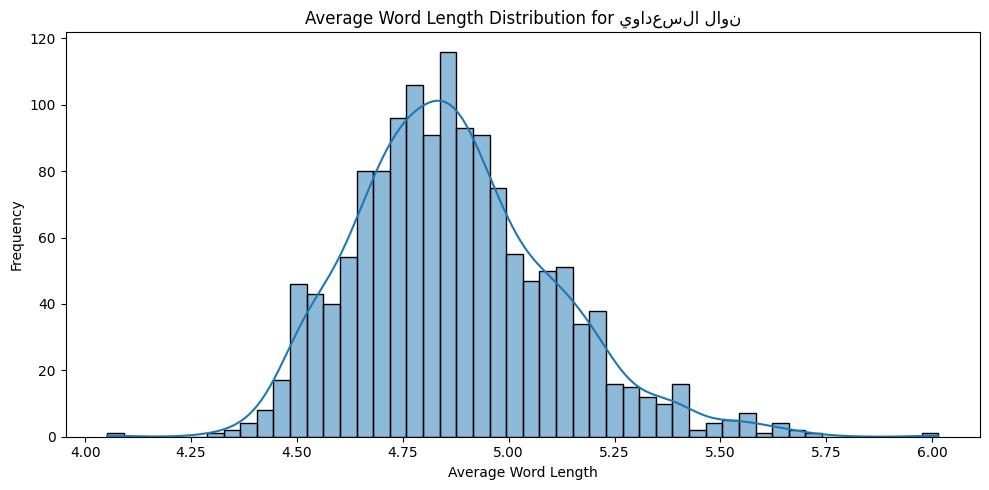

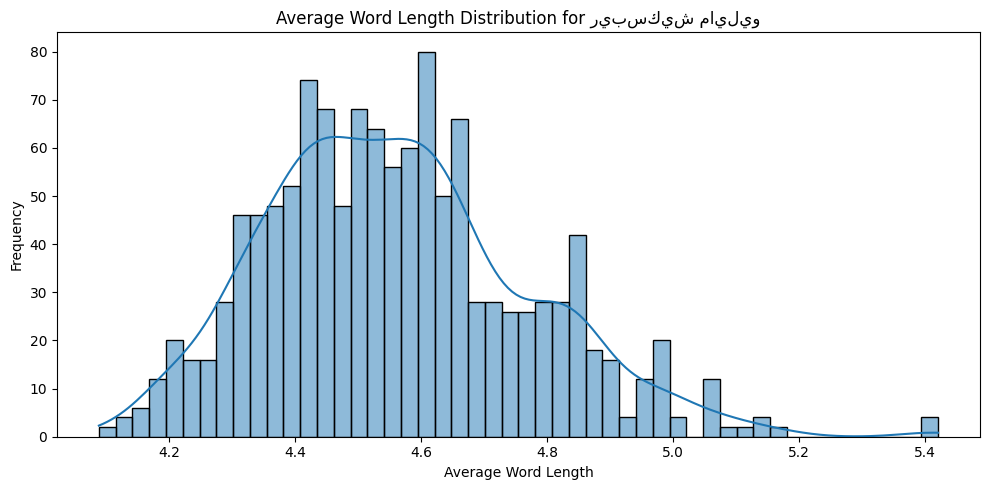

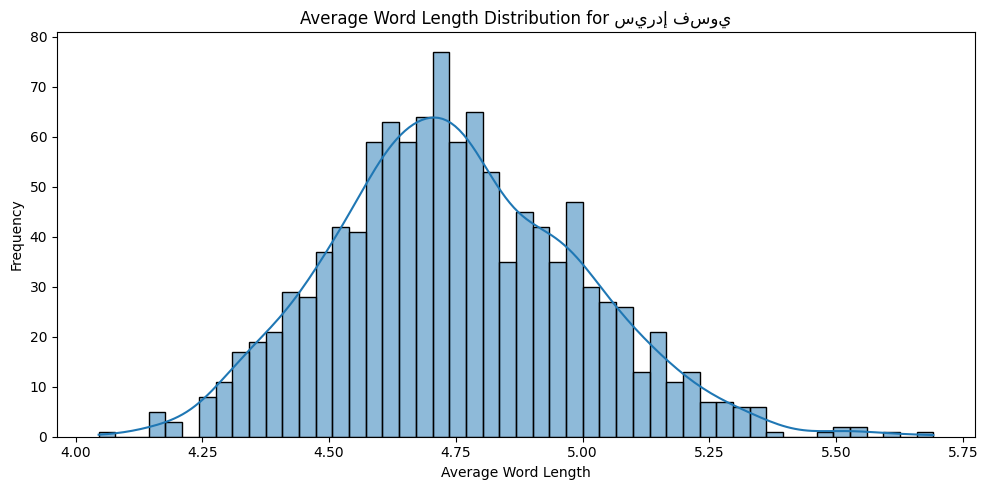

In [ ]:
for author_name, author_df in grouped_by_author:
    plt.figure(figsize=(10, 5))
    sns.histplot(author_df['avg_word_length'], bins=50, kde=True) # Increased the number of bins to 100
    names_rev_author = author_name[-1::-1]
    plt.title(f'Average Word Length Distribution for {names_rev_author}')
    plt.xlabel('Average Word Length')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

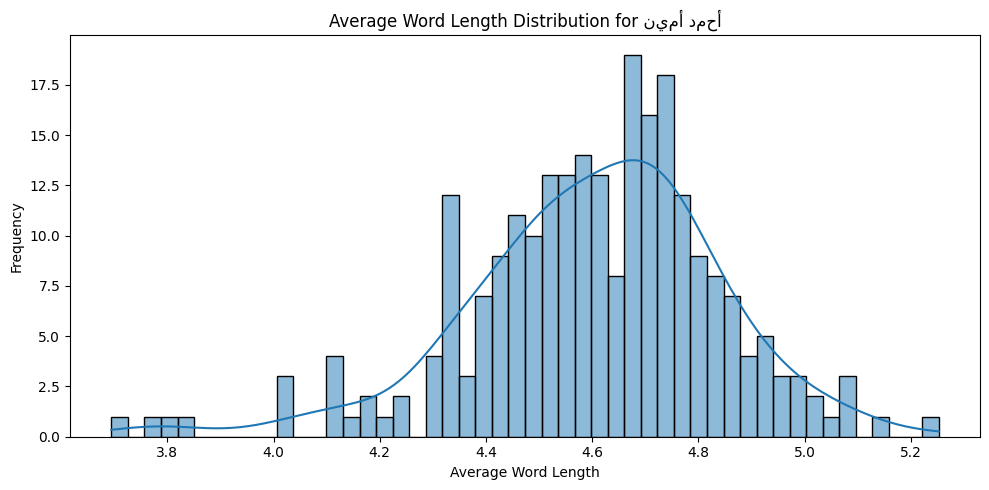

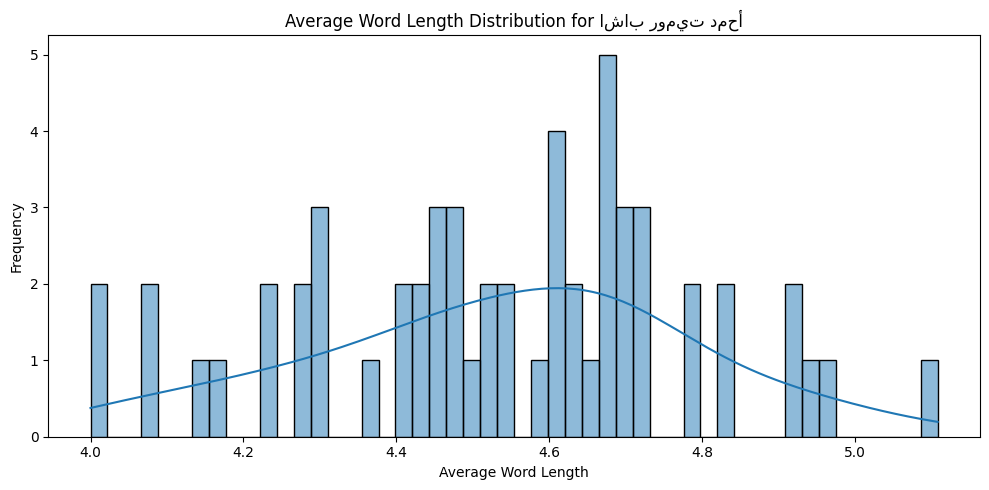

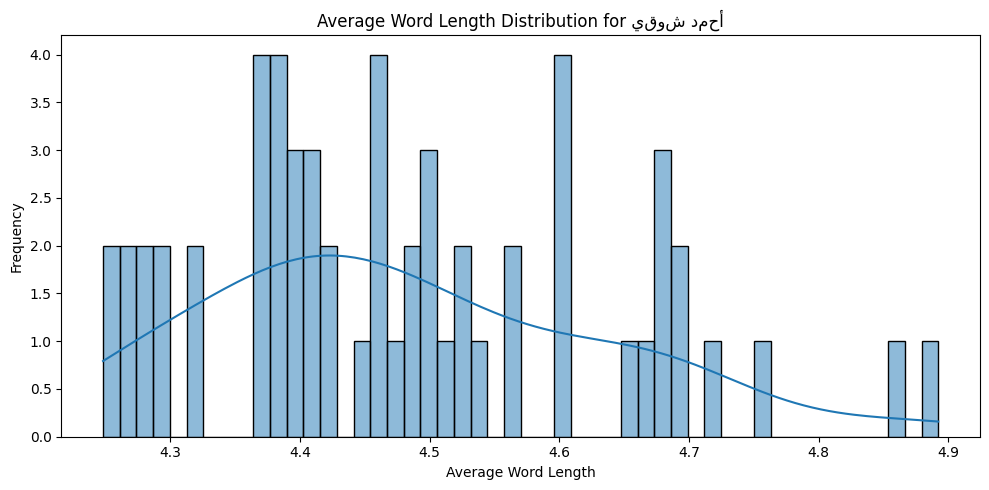

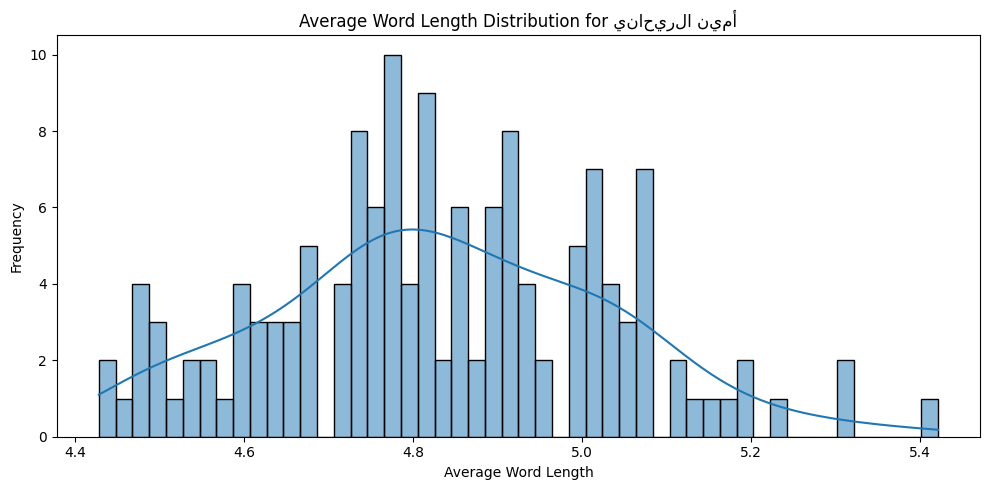

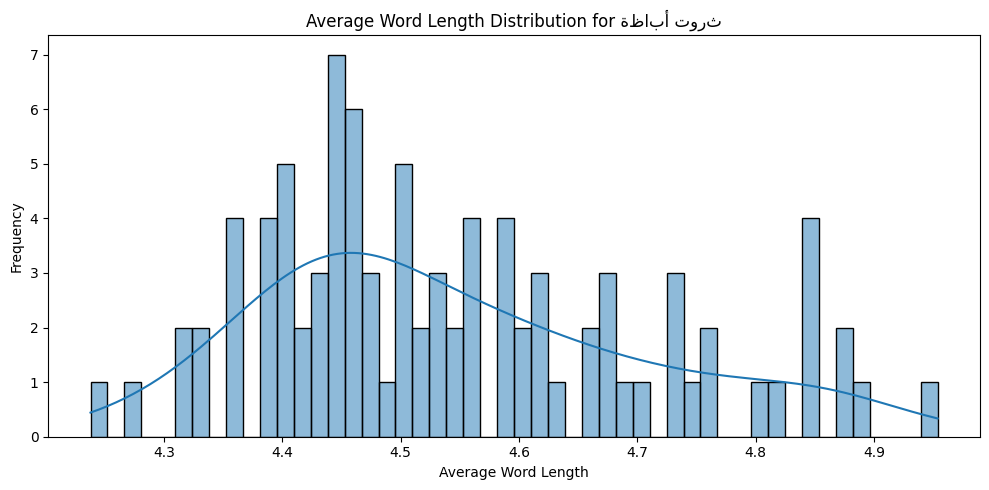

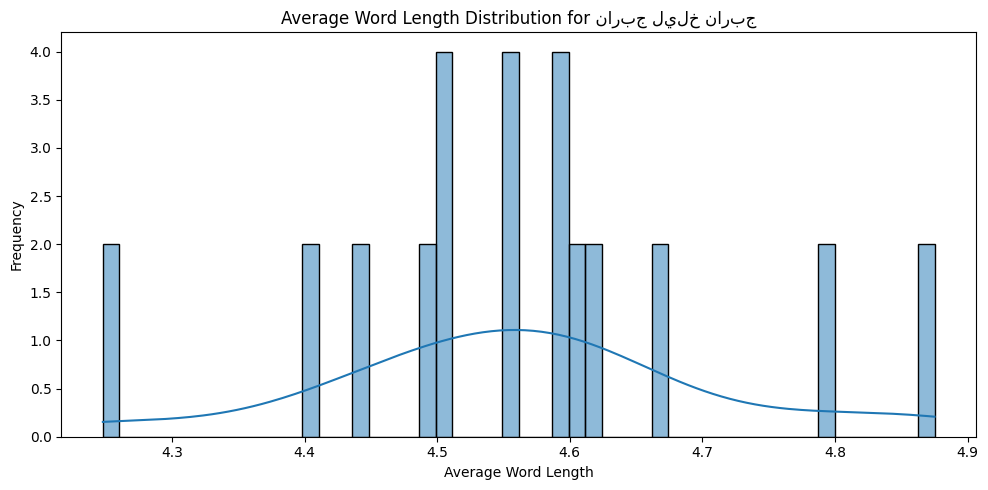

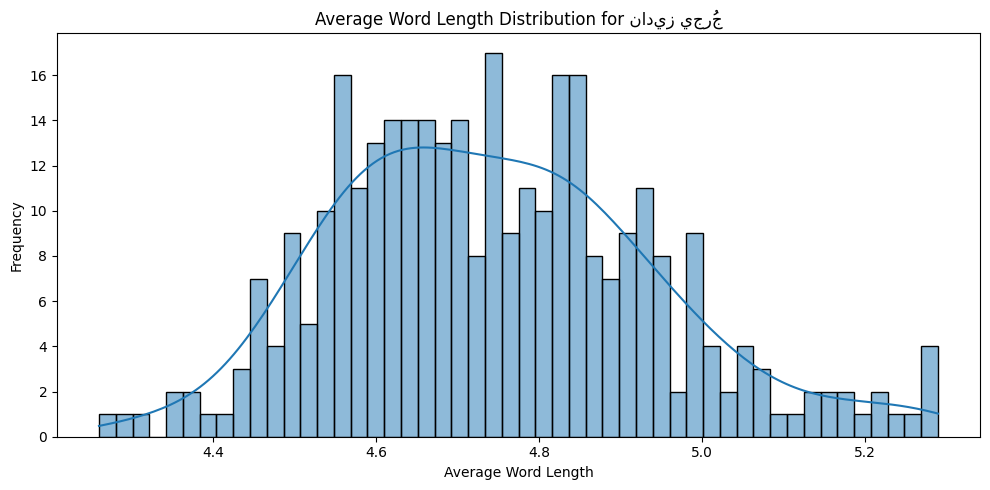

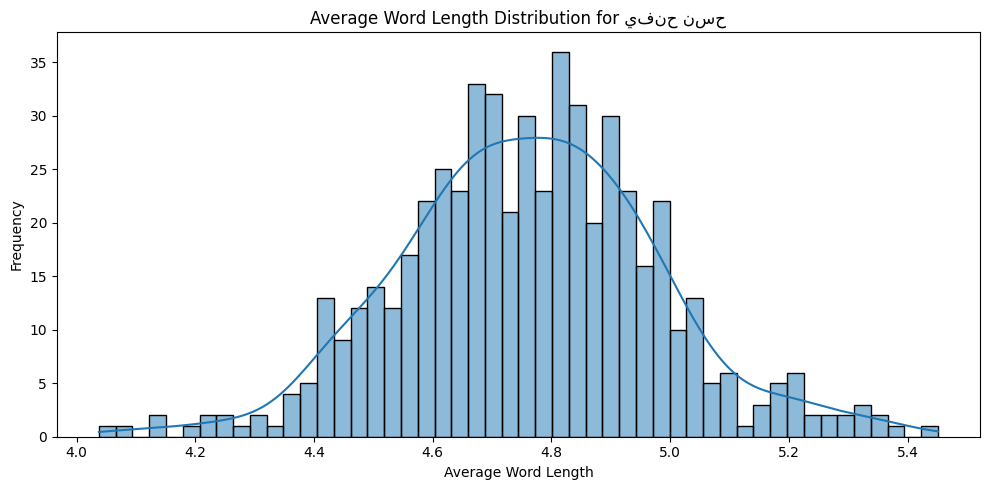

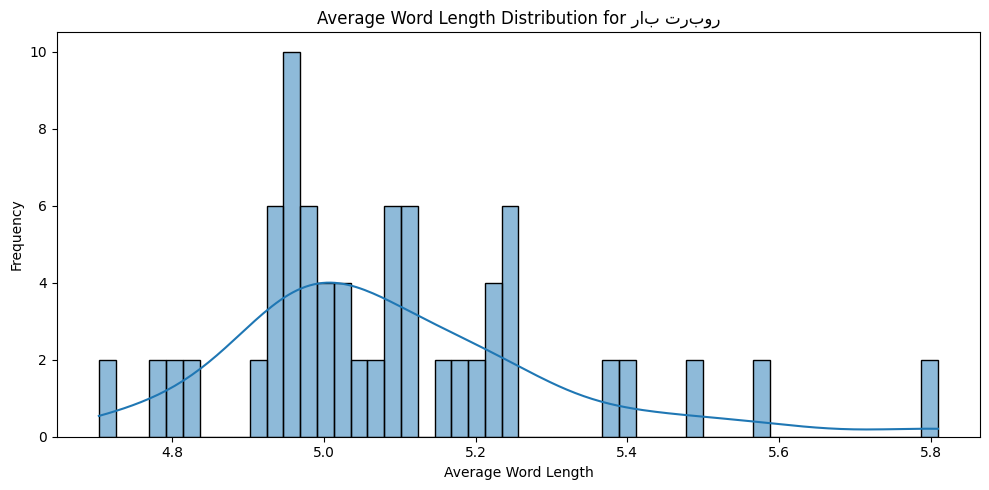

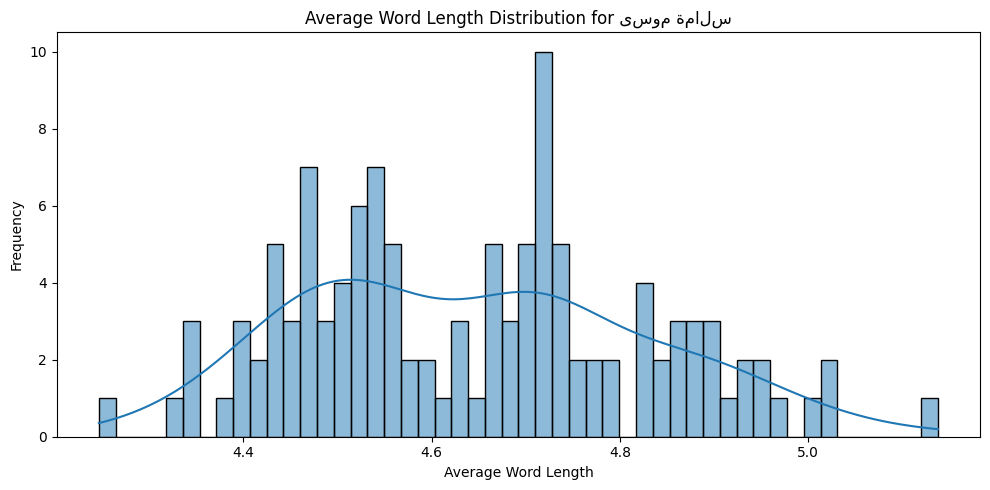

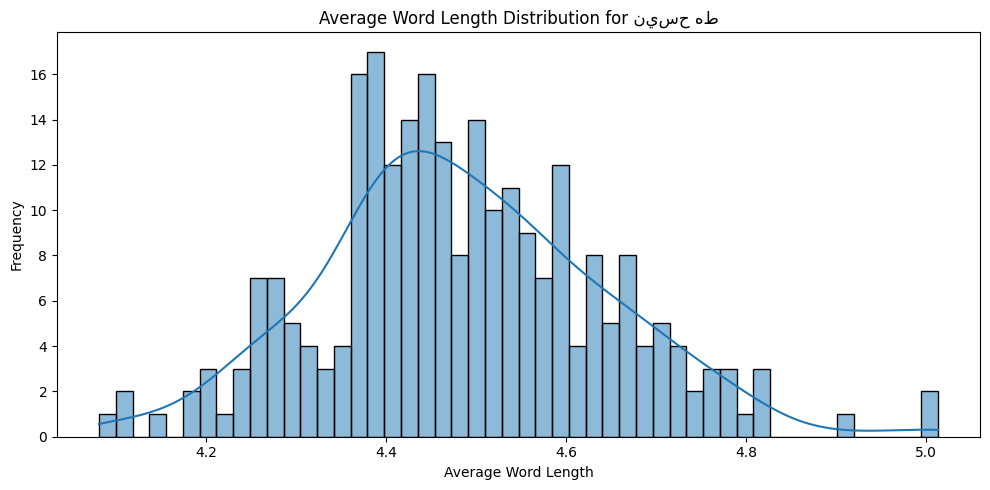

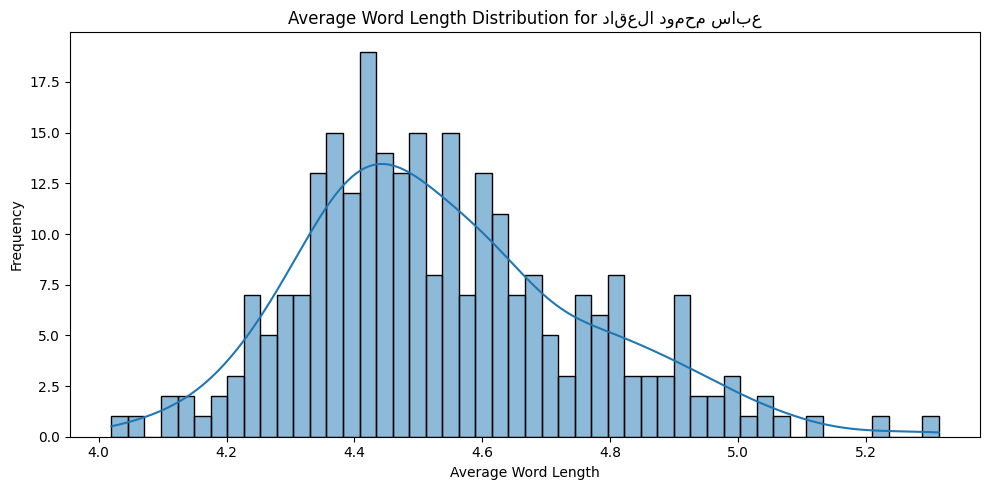

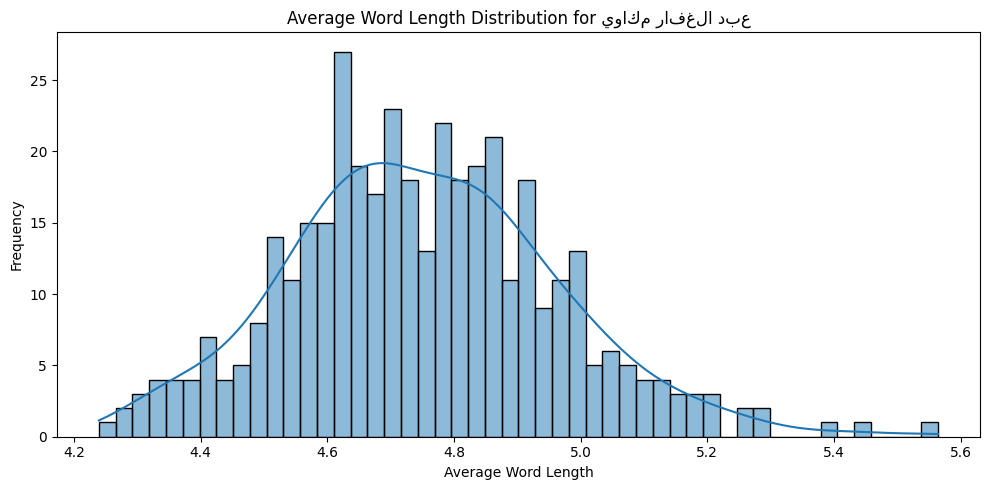

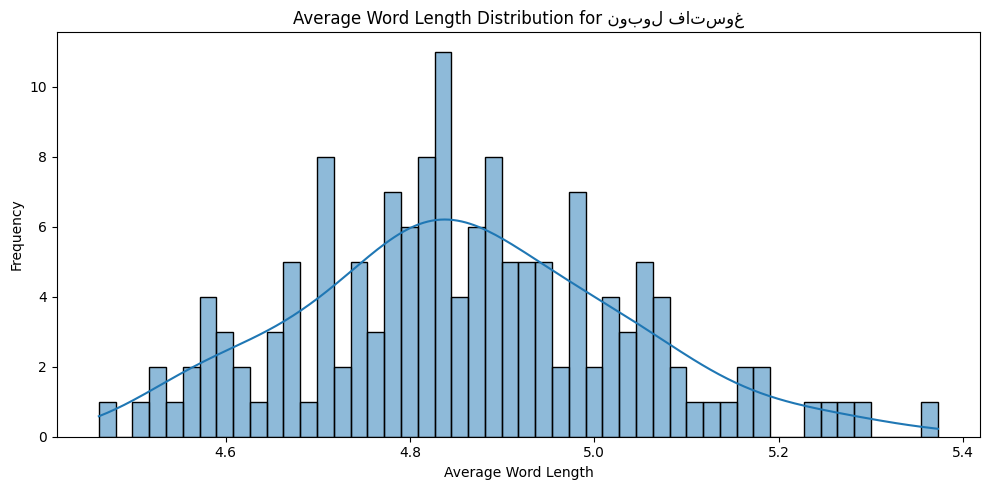

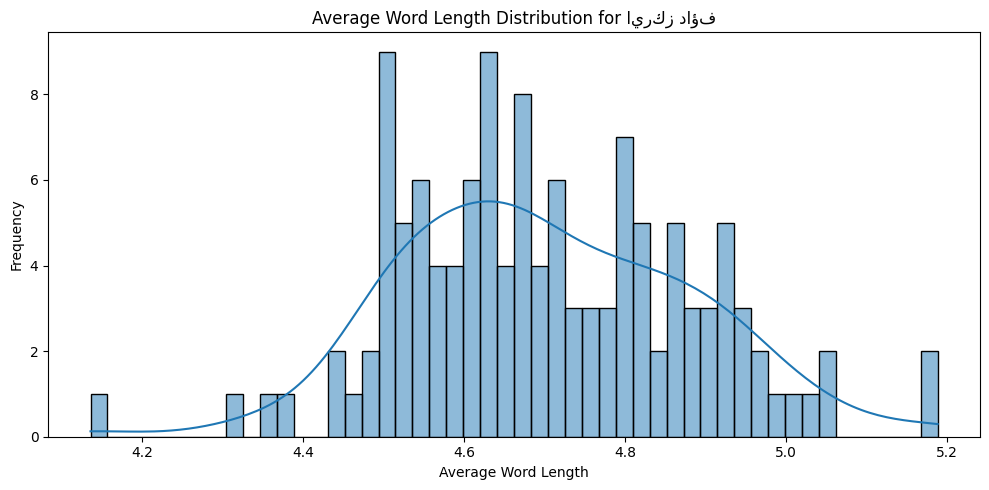

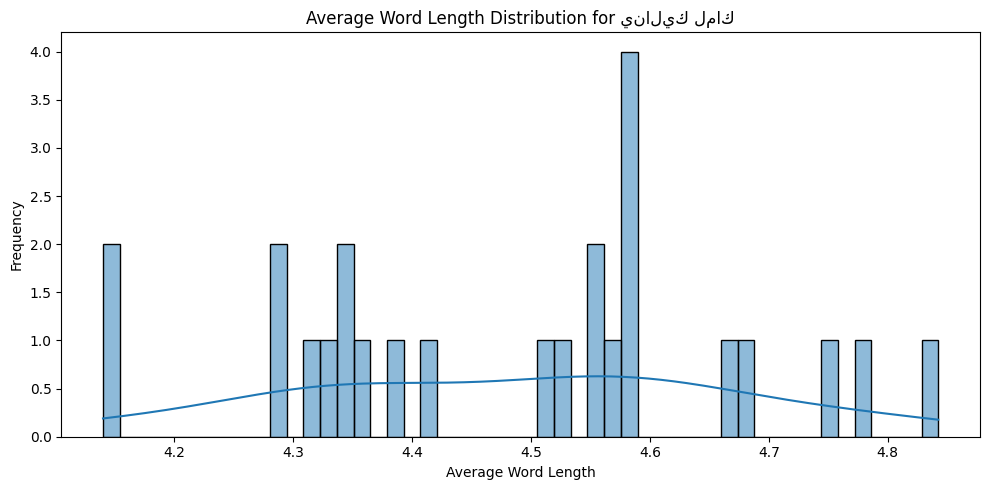

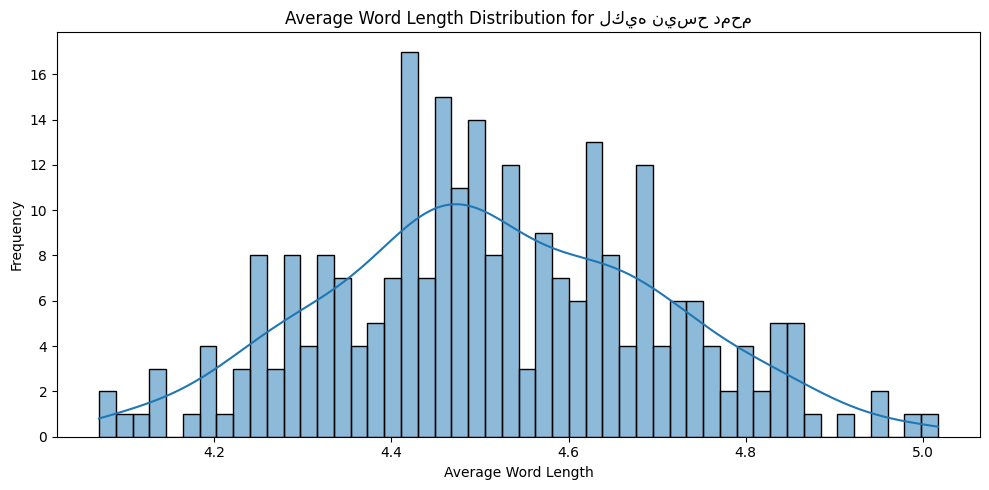

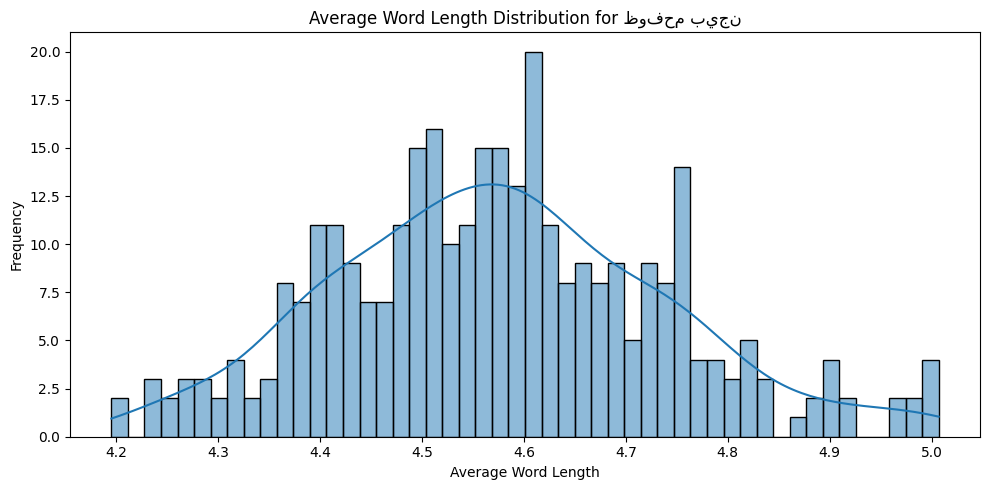

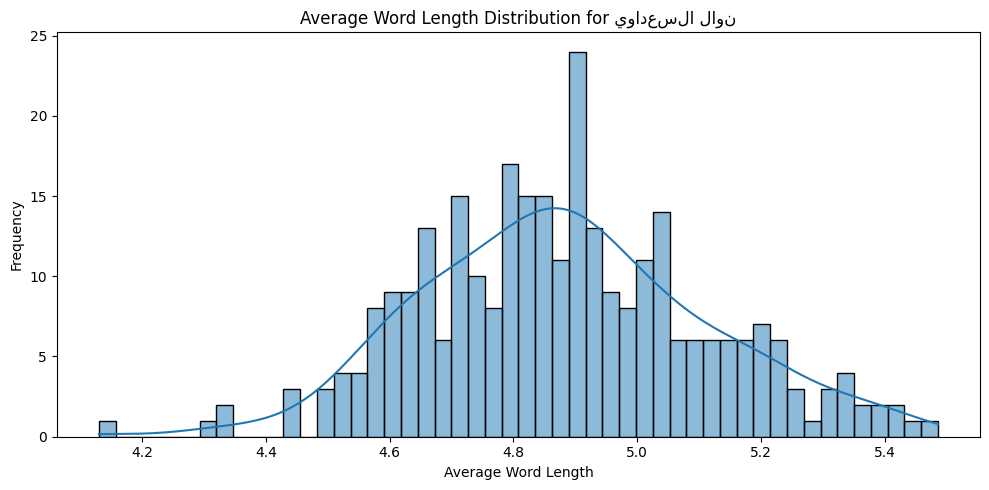

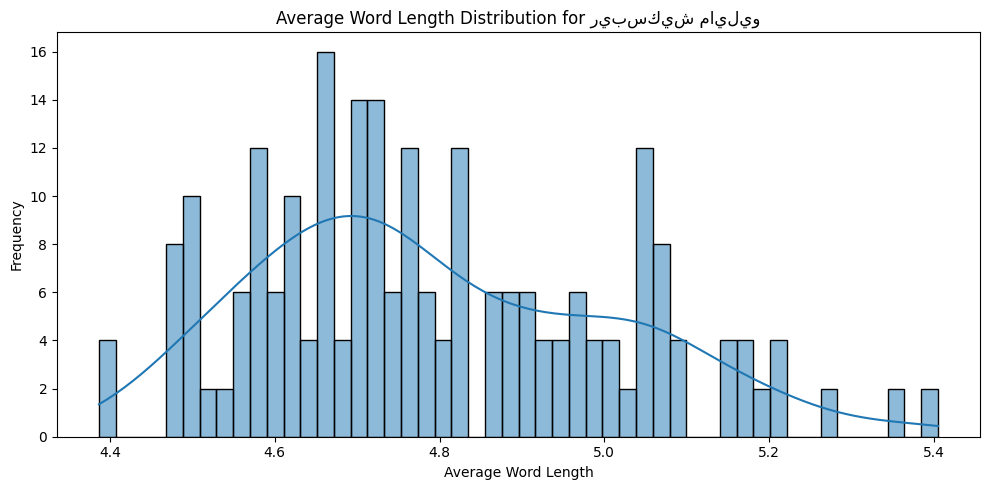

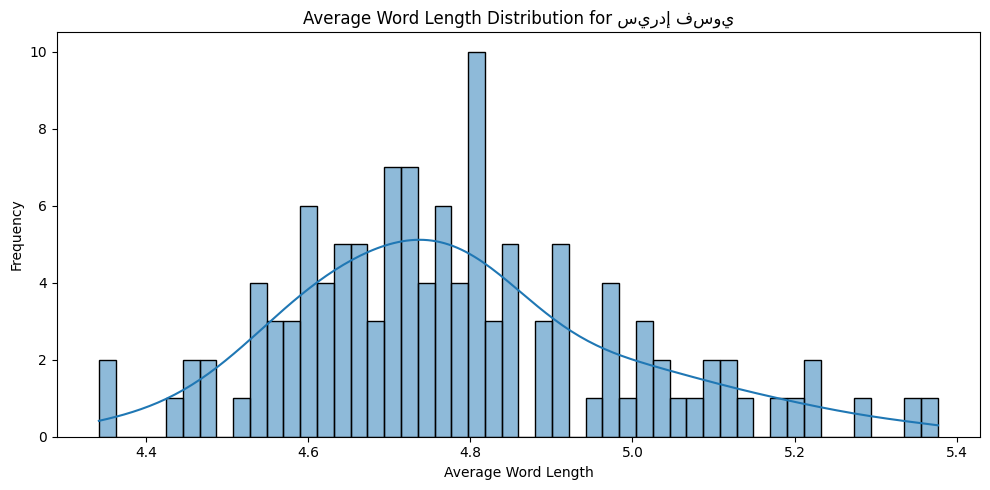

In [20]:
for author_name, author_df in valid_grouped_by_author:
    plt.figure(figsize=(10, 5))
    sns.histplot(author_df['avg_word_length'], bins=50, kde=True) # Increased the number of bins to 100
    names_rev_author = author_name[-1::-1]
    plt.title(f'Average Word Length Distribution for {names_rev_author}')
    plt.xlabel('Average Word Length')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

## Large Texts

In [ ]:
large_texts = train_data[train_data['text_size'] > 3000].sort_values(by='text_size', ascending=False)
len(large_texts)

97

In [23]:
valid_large_texts = valid_data[valid_data['text_size'] > 3000].sort_values(by='text_size', ascending=False)
len(valid_large_texts)

6

In [ ]:
large_texts.author.value_counts()

In [25]:
valid_large_texts.author.value_counts()

author
طه حسين              3
عباس محمود العقاد    1
جُرجي زيدان          1
محمد حسين هيكل       1
Name: count, dtype: int64

In [ ]:
authors_with_large_texts = large_texts['author'].unique()
print("Authors with texts larger than 3000 characters sorted:")
for author in authors_with_large_texts:
    print(author)

len(authors_with_large_texts)

Authors with texts larger than 3000 characters sorted:
أحمد شوقي
أمين الريحاني
عباس محمود العقاد
أحمد تيمور باشا
أحمد أمين
حسن حنفي
فؤاد زكريا
طه حسين
نجيب محفوظ
محمد حسين هيكل
ثروت أباظة


11

In [26]:
valid_authors_with_large_texts = large_texts['author'].unique()
print("Authors with texts larger than 3000 characters sorted:")
for author in valid_authors_with_large_texts:
    print(author)

len(valid_authors_with_large_texts)

Authors with texts larger than 3000 characters sorted:
طه حسين
عباس محمود العقاد
جُرجي زيدان
محمد حسين هيكل


4

## Langauge Detection

In [27]:
!pip install -qU langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 22.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [28]:
from langdetect import detect, LangDetectException
import pandas as pd

In [29]:
def detect_language(text):
    """
    Detects the language of the input text.

    Args:
        text (str): The input string to detect the language from.

    Returns:
        str: The detected language code (e.g., 'en', 'ar'), or 'unknown' if detection fails.
    """
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'

In [ ]:
# Apply the language detection function to the 'text_in_author_style' column
train_data['detected_language'] = train_data['text_in_author_style'].apply(detect_language)

# Display the value counts of the detected languages
print("Language distribution in the dataset:")
display(train_data['detected_language'].value_counts())

In [30]:
# Apply the language detection function to the 'text_in_author_style' column
valid_data['detected_language'] = valid_data['text_in_author_style'].apply(detect_language)

# Display the value counts of the detected languages
print("Language distribution in the dataset:")
display(valid_data['detected_language'].value_counts())

Language distribution in the dataset:


detected_language
ar    4157
Name: count, dtype: int64

# Cleaning and Preprocessing

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

## Drop Duplicates

In [ ]:
train_data['text_in_author_style'].duplicated(keep='first').sum()

np.int64(2338)

In [32]:
valid_data['text_in_author_style'].duplicated(keep='first').sum()

np.int64(175)

In [ ]:
train_data.drop_duplicates(['text_in_author_style', 'author'],keep='first', inplace=True, ignore_index=True)

In [ ]:
print(len(train_data))
print(len(train_data.author.value_counts()))
train_data.author.value_counts()

32784
21


author
حسن حنفي             3744
أحمد أمين            2897
جُرجي زيدان          2768
محمد حسين هيكل       2627
طه حسين              2376
عباس محمود العقاد    1829
فؤاد زكريا           1773
نجيب محفوظ           1634
أمين الريحاني        1567
عبد الغفار مكاوي     1520
غوستاف لوبون         1515
نوال السعداوي        1411
روبرت بار            1341
يوسف إدريس           1140
سلامة موسى            984
أحمد تيمور باشا       815
ثروت أباظة            757
أحمد شوقي             679
ويليام شيكسبير        618
كامل كيلاني           414
جبران خليل جبران      375
Name: count, dtype: int64

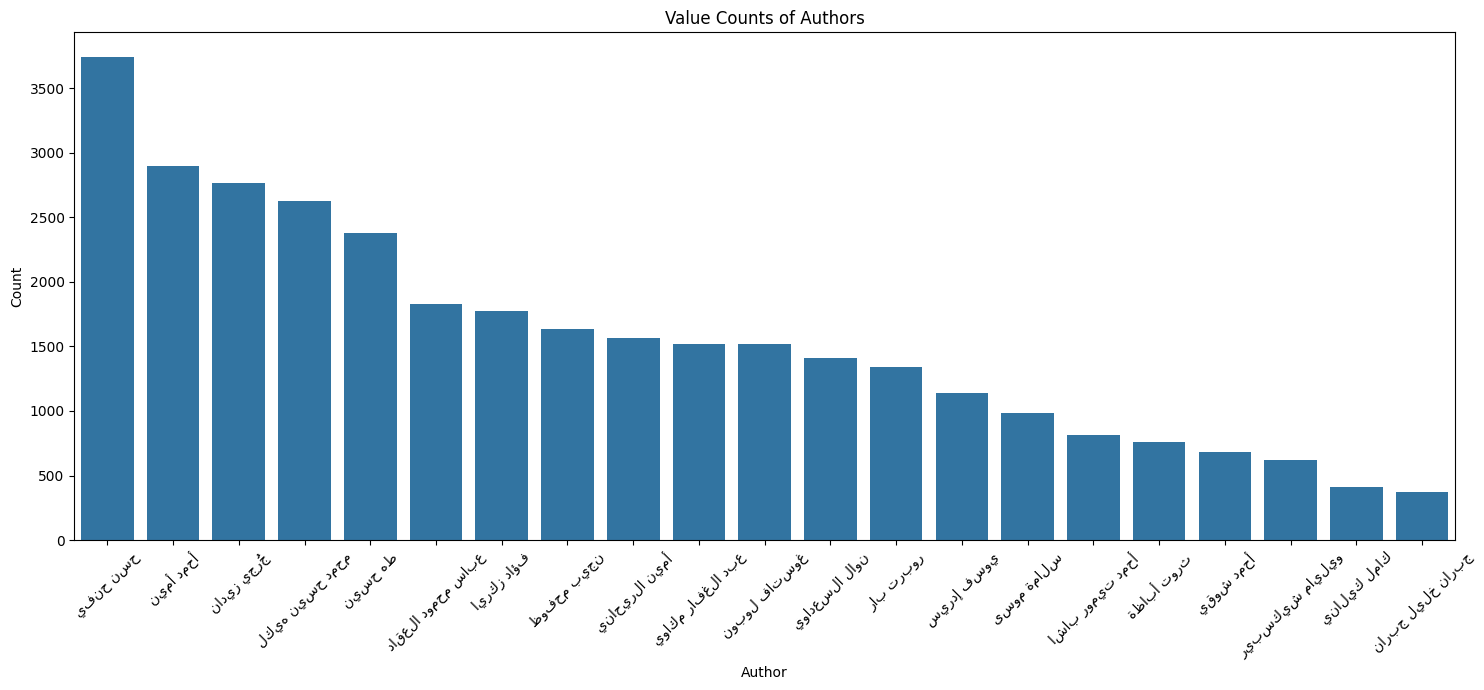

In [ ]:
# Get the value counts of the 'author' column
author_counts = train_data['author'].value_counts()
names_rev = [name[-1::-1] for name in author_counts.index]

# Create a bar chart
plt.figure(figsize=(15, 7)) # Increased figure size
sns.barplot(x=names_rev, y=author_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Author')
plt.ylabel('Count')
plt.title('Value Counts of Authors')
plt.tight_layout()
plt.show()

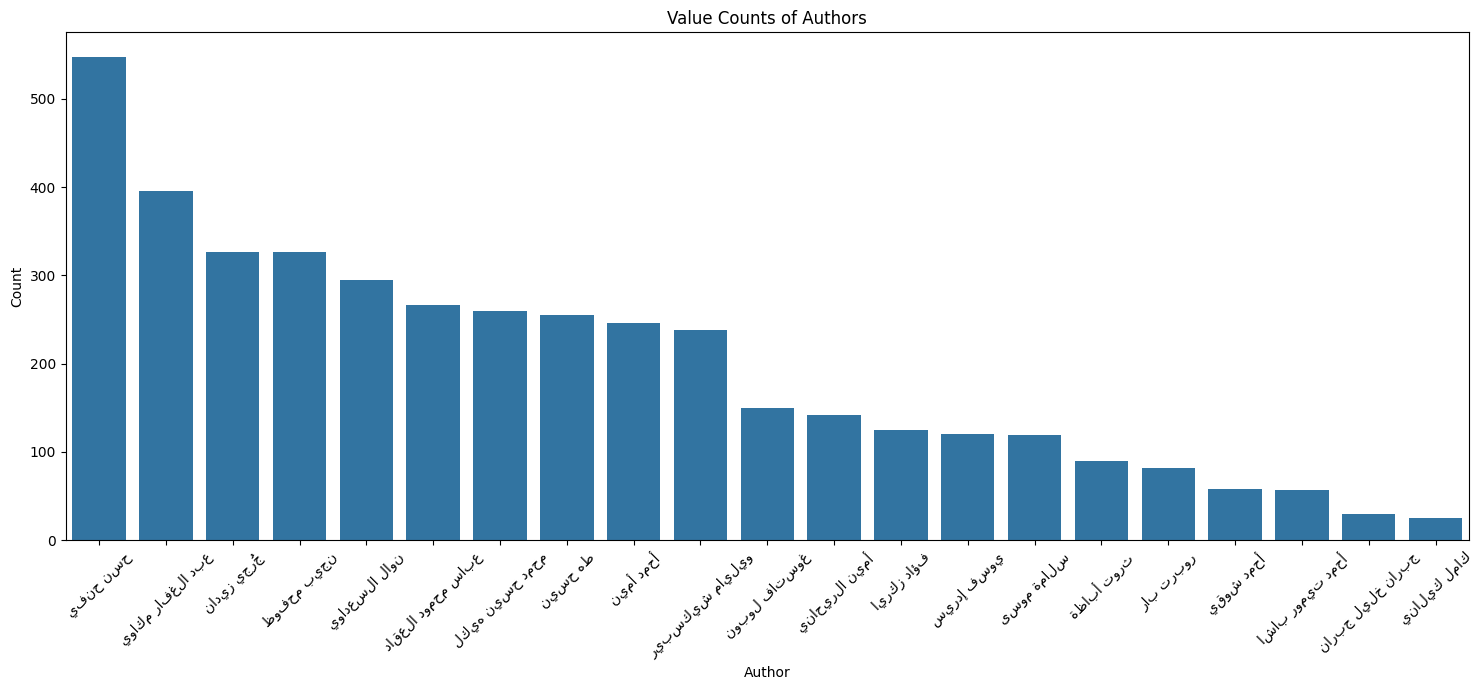

In [33]:
# Get the value counts of the 'author' column
valid_author_counts = valid_data['author'].value_counts()
names_rev = [name[-1::-1] for name in valid_author_counts.index]

# Create a bar chart
plt.figure(figsize=(15, 7)) # Increased figure size
sns.barplot(x=names_rev, y=valid_author_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Author')
plt.ylabel('Count')
plt.title('Value Counts of Authors')
plt.tight_layout()
plt.show()

## Splitting large text

In [ ]:
!pip install -qU langchain

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 2048,
    chunk_overlap  = 200,
    length_function = len,
)

In [ ]:
# train_data['text_size'] = train_data['text_in_author_style'].apply(len)
# train_data.head()

In [ ]:
splitted_data_list = []

for index, row in train_data.iterrows():
    text = row['text_in_author_style']
    author = row['author']
    original_id = row['id']
    text_size = row['text_size']

    # Check if the text is large
    if text_size > 3000:
        # Split the large text
        chunks = text_splitter.split_text(text)
        # Add each chunk as a new entry
        for i, chunk in enumerate(chunks):
            splitted_data_list.append({
                'original_id': original_id,
                'text_in_author_style': chunk,
                'author': author,
                'text_size': len(chunk),
                'chunk_index': i,
                'is_split': True # Flag to indicate it was a split chunk
            })
    else:
        # Add the original text if it's not large
        splitted_data_list.append({
            'original_id': original_id,
            'text_in_author_style': text,
            'author': author,
            'text_size': len(text),
            'chunk_index': 0, # Indicate it's the first and only chunk
            'is_split': False # Flag to indicate it was not split
        })

train_data_splitted = pd.DataFrame(splitted_data_list)

In [ ]:
# Display the first few rows of the new DataFrame and some info
print(f"Original number of texts: {len(train_data)}")
print(f"Number of texts/chunks in the processed data: {len(train_data_splitted)}")

print("\nFirst few rows of the processed data:")
display(train_data_splitted[train_data_splitted['is_split'] == True])

print("\nValue counts for 'is_split' column:")
display(train_data_splitted['is_split'].value_counts())

Original number of texts: 32784
Number of texts/chunks in the processed data: 32941

First few rows of the processed data:


original_id                               text_in_author_style  \
1998          7841  وأخيرًا فقد نشأت في القرنين الثامن عشر والتاسع...   
1999          7841  يدعونا هنا إلى الإشارة إليها؛ لأنها معروفة ومأ...   
2013          7855  كذلك قد يُوجَّه إلى هذا الرأي اعتراضٌ ذو صبغة ...   
2014          7855  إن البحث الفلسفي يقتضي أمرين أساسيين هما: النض...   
2045          7886  أما اللذة الحرة-المنزَّهة عن مثل هذه\n\nالأغرا...   
...            ...                                                ...   
32306        44726  ولا تنم عن نرجسٍ مؤنس\n\nيضحك عنه الزمن القاطب...   
32307        44726  عظمت فكادت أن تكون إوَزَّة\n\nونوت فكاد إهابها...   
32308        44726  من كل قاتلة قتلى، وآسرةٍ\n\nأسرى، وليس لها في ...   
32312        44730  لن يسبق الله مدلج\n\nلعل قلوبًا قد أطلتم غليله...   
32313        44730  تكون له صولة الصارم\n\nتكون له رأفة الراحم\n\n...   

                  author  text_size  chunk_index  is_split  
1998          فؤاد زكريا       1975            0      True  
1999          فؤاد زكريا       2044            1      True  
2013          فؤاد زكريا       2039            0      True  
2014          فؤاد زكريا       1256            1      True  
2045          فؤاد زكريا       1974            0      True  
...                  ...        ...          ...       ...  
32306  عباس محمود العقاد       2041            1      True  
32307  عباس محمود العقاد       2039            2      True  
32308  عباس محمود العقاد       2046            3      True  
32312  عباس محمود العقاد       2026            0      True  
32313  عباس محمود العقاد       1587            1      True  

[254 rows x 6 columns]


Value counts for 'is_split' column:


is_split
False    32687
True       254
Name: count, dtype: int64

In [ ]:
train_data_splitted['text_size'].describe()

count    32941.000000
mean      1825.444947
std        277.572256
min         22.000000
25%       1756.000000
50%       1918.000000
75%       1998.000000
max       2999.000000
Name: text_size, dtype: float64

## Normalization

In [34]:
import re

In [35]:
def remove_diacritics(text):
  text = text.replace(u"\u064B", "")  # fatHatayn
  text = text.replace(u"\u064C", "")  # Dammatayn
  text = text.replace(u"\u064D", "")  # kasratayn
  text = text.replace(u"\u064E", "")  # fatHa
  text = text.replace(u"\u064F", "")  # Damma
  text = text.replace(u"\u0650", "")  # kasra
  text = text.replace(u"\u0651", "")  # shaddah
  text = text.replace(u"\u0652", "")  # sukuun
  text = text.replace(u"\u0670", "`")  # dagger 'alif
  return text

In [ ]:
train_data_splitted['cleaned_text'] = train_data_splitted['text_in_author_style'].apply(remove_diacritics)

In [ ]:
train_data_splitted.head()

original_id                               text_in_author_style      author  \
0         5843  هذه الكتب التي أصدرتُها منذ بدأت كتابة باب "من...  يوسف إدريس   
1         5844  صعب جِدًّا في ظل هذا التقسيم الإرهابي أن أقول ...  يوسف إدريس   
2         5845  كان ممكنًا أن أتفادى هذا\n\nالموضوع الشائك، وأ...  يوسف إدريس   
3         5846  ومن المُمكن للعراق وحده أن يَجتثَّه ويقضي على ...  يوسف إدريس   
4         5847  كنتُ أريد أن أتناول موضوعًا من هذه المواضيع.\n...  يوسف إدريس   

   text_size  chunk_index  is_split  \
0       1921            0     False   
1       1616            0     False   
2       1913            0     False   
3       2047            0     False   
4       2022            0     False   

                                        cleaned_text  
0  هذه الكتب التي أصدرتها منذ بدأت كتابة باب "من ...  
1  صعب جدا في ظل هذا التقسيم الإرهابي أن أقول إن ...  
2  كان ممكنا أن أتفادى هذا\n\nالموضوع الشائك، وأذ...  
3  ومن الممكن للعراق وحده أن يجتثه ويقضي على الهج...  
4  كنت أريد أن أتناول موضوعا من هذه المواضيع.\n\n...

In [36]:
valid_data['cleaned_text'] = valid_data['text_in_author_style'].apply(remove_diacritics)

In [37]:
valid_data.head()

id                               text_in_author_style      author  \
0  3835  من طفل في الخمسين\n\nعمري ما احتفلت أو حفلت بع...  يوسف إدريس   
1  3836  ذلك الزمن العام هو العداد العام الذي\n\nدام يع...  يوسف إدريس   
2  3837  مصر الغنية المثقفة المصنِّعة، والعرب\n\nوقد\n\...  يوسف إدريس   
3  3838  ولأنها غريبة وراودتني فيها عن الناس وعن الحياة...  يوسف إدريس   
4  3839  وليس ما ذكرته مرارة ولا ندمًا؛ فقد كان لا يمكن...  يوسف إدريس   

   avg_word_length  text_size detected_language  \
0         4.485623       1747                ar   
1         4.578171       1922                ar   
2         4.816770       1903                ar   
3         4.733333       1747                ar   
4         4.537367       1580                ar   

                                        cleaned_text  
0  من طفل في الخمسين\n\nعمري ما احتفلت أو حفلت بع...  
1  ذلك الزمن العام هو العداد العام الذي\n\nدام يع...  
2  مصر الغنية المثقفة المصنعة، والعرب\n\nوقد\n\nأ...  
3  ولأنها غريبة وراودتني فيها عن الناس وعن الحياة...  
4  وليس ما ذكرته مرارة ولا ندما؛ فقد كان لا يمكن ...

In [39]:
valid_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Authorship Identification/Data/valid_data_cleaned.csv')

# Gemi